In [28]:
# {r include=FALSE}
pkgs <- c("DBI", "RSQLite", "reshape2", "ggplot2", "gridExtra","hrbrthemes", "tidyr", "viridis",
          "data.table", "gridBase", "grid", "scales","dplyr","gapminder","gganimate","GGally") 
for (pkg in pkgs) {
  if (! (pkg %in% rownames(installed.packages()))) { install.packages(pkg) }
  require(pkg, character.only = TRUE)
}
# rm(pkgs, pkg)
# rm(list = ls(all = TRUE))

In [29]:
# # Libraries
# library(ggplot2)
# library(hrbrthemes)
# library(dplyr)
# library(tidyr)
# library(viridis)

In [30]:
db <- dbConnect(drv = SQLite(), 
                dbname = "/kaggle/input/japan-trade-statistics/ym_2018.db")
ym_2018 <- as.data.table(dbReadTable(db, "ym_2018"))
head(ym_2018,5)

exp_imp,Year,month,Country,Unit1,Unit2,Q1,Q2,Value,hs2,hs4,hs6,hs9
<int>,<int>,<chr>,<int>,<chr>,<chr>,<int64>,<int64>,<int>,<chr>,<chr>,<chr>,<chr>
1,2018,01,205,,NO,0,0,0,01,0101,010121,010121000
1,2018,01,206,,NO,0,0,0,01,0101,010121,010121000
1,2018,01,213,,NO,0,2,30014,01,0101,010121,010121000
1,2018,01,220,,NO,0,1,9020,01,0101,010121,010121000
1,2018,01,304,,NO,0,1,1500,01,0101,010121,010121000


In [31]:
db <- dbConnect(drv = SQLite(), 
                dbname = "/kaggle/input/japan-trade-statistics/y_1997.db")
year_from_1997 <- as.data.table(dbReadTable(db, "year_from_1997"))
# head(year_from_1997,5)
# Lấy ra tất cả các giá trị khác nhau trong cột "Year"
unique_years <- unique(year_from_1997$Year)

# In ra các giá trị "Year" đã lấy
print(unique_years)



 [1] 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
[16] 2012 2013 2014 2015 2016 2017 2018 2019


In [32]:
db <- dbConnect(drv = SQLite(), 
                dbname = "/kaggle/input/japan-trade-statistics/ym_2017_2020.db")
ym_2020 <- as.data.table(dbReadTable(db, "ym_2020"))

db <- dbConnect(drv = SQLite(), 
                dbname = "/kaggle/input/japan-trade-statistics/ym_2018.db")
ym_2018 <- as.data.table(dbReadTable(db, "ym_2018"))

db <- dbConnect(drv = SQLite(), 
                dbname = "/kaggle/input/japan-trade-statistics/ym_2018_2020.db")
ym_2018_2020 <- as.data.table(dbReadTable(db, "ym_2018_2020"))

db <- dbConnect(drv = SQLite(), 
                dbname = "/kaggle/input/japan-trade-statistics/ym_2019.db")
ym_2019 <- as.data.table(dbReadTable(db, "ym_2019"))

db <- dbConnect(drv = SQLite(), 
                dbname = "/kaggle/input/japan-trade-statistics/ym_2020.db")
ym_2020 <- as.data.table(dbReadTable(db, "ym_2020"))

db <- dbConnect(drv = SQLite(), 
                dbname = "/kaggle/input/japan-trade-statistics/ym_2021.db")
ym_2021 <- as.data.table(dbReadTable(db, "ym_2021"))


In [33]:
db <- dbConnect(drv = SQLite(), 
                dbname = "/kaggle/input/japan-trade-statistics/codes.db")
hs2 <- as.data.table(dbReadTable(db, "hs2_eng"))
hs2 <- hs2[complete.cases(hs2)] # loại bỏ NA

db <- dbConnect(drv = SQLite(), 
                dbname = "/kaggle/input/japan-trade-statistics/codes.db")
hs4 <- as.data.table(dbReadTable(db, "hs4_eng"))
hs4 <- hs4[complete.cases(hs4)] # loại bỏ NA

db <- dbConnect(drv = SQLite(), 
                dbname = "/kaggle/input/japan-trade-statistics/codes.db")
hs6 <- as.data.table(dbReadTable(db, "hs6_eng"))
hs6 <- hs6[complete.cases(hs6)] # loại bỏ NA

db <- dbConnect(drv = SQLite(), 
                dbname = "/kaggle/input/japan-trade-statistics/codes.db")
hs9 <- as.data.table(dbReadTable(db, "hs9_eng"))
hs9 <- hs9[complete.cases(hs9)] # loại bỏ NA

db <- dbConnect(drv = SQLite(), 
                dbname = "/kaggle/input/japan-trade-statistics/codes.db")
country <- as.data.table(dbReadTable(db, "country_eng"))
country <- country[complete.cases(country)] # loại bỏ NA

In [34]:
X <- year_from_1997
X_copy <- X
ym_2021_copy <- ym_2021
ym_2020_copy <- ym_2020

ym_2020_copy <- ym_2020_copy %>% 
  select(-month, -ym)

ym_2021_copy <- ym_2021_copy %>% 
  select(-month, -ym)

X_copy <- X_copy %>% 
  select(-Unit1, -Unit2)


X_copy <- X_copy %>%
  select(index, exp_imp, Year, Country, hs2, hs4, hs6, hs9, Q1, Q2, Value)


In [35]:
head(ym_2021_copy,5)

index,exp_imp,Year,Country,hs2,hs4,hs6,hs9,Q1,Q2,Value
<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int64>,<int64>,<int>
0,1,2021,213,01,0101,010121,010121000,0,4,25294
1,1,2021,213,01,0101,010129,010129000,0,3,11382
2,1,2021,106,01,0106,010612,010612000,0,1,12735
3,1,2021,103,01,0106,010619,010619000,0,10335,28479
4,1,2021,105,01,0106,010619,010619000,0,344,15410


In [36]:
head(X_copy,5)

index,exp_imp,Year,Country,hs2,hs4,hs6,hs9,Q1,Q2,Value
<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int64>,<int64>,<int64>
0,1,1997,304,01,0101,010111,010111000,0,2,26800
1,1,1997,108,01,0101,010119,010119000,0,2,180480
2,1,1997,207,01,0101,010119,010119000,0,2,20000
3,1,1997,208,01,0101,010119,010119000,0,2,2850
4,1,1997,210,01,0101,010119,010119000,0,1,50000


In [37]:
# Hợp các bảng lại với nhau
total_table <- rbind(X_copy, ym_2020_copy, ym_2021_copy)

# Hiển thị bảng tổng
head(total_table,5)



index,exp_imp,Year,Country,hs2,hs4,hs6,hs9,Q1,Q2,Value
<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int64>,<int64>,<int64>
0,1,1997,304,01,0101,010111,010111000,0,2,26800
1,1,1997,108,01,0101,010119,010119000,0,2,180480
2,1,1997,207,01,0101,010119,010119000,0,2,20000
3,1,1997,208,01,0101,010119,010119000,0,2,2850
4,1,1997,210,01,0101,010119,010119000,0,1,50000


In [38]:
unique_years_new <- unique(total_table$Year)
unique_years_new

[1] 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
[16] 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021

In [39]:
X <- year_from_1997
head(X,5)
unique_years_X <- unique(X$Year)

# In ra các giá trị "Year" đã lấy
unique_years_X

index,exp_imp,Year,Country,Unit1,Unit2,Q1,Q2,Value,hs2,hs4,hs6,hs9
<int>,<int>,<int>,<chr>,<chr>,<chr>,<int64>,<int64>,<int64>,<chr>,<chr>,<chr>,<chr>
0,1,1997,304,NA,NO,0,2,26800,01,0101,010111,010111000
1,1,1997,108,NA,NO,0,2,180480,01,0101,010119,010119000
2,1,1997,207,NA,NO,0,2,20000,01,0101,010119,010119000
3,1,1997,208,NA,NO,0,2,2850,01,0101,010119,010119000
4,1,1997,210,NA,NO,0,1,50000,01,0101,010119,010119000


[1] 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
[16] 2012 2013 2014 2015 2016 2017 2018 2019

In [40]:
hs2[, hs2 := as.numeric(hs2)]
hs4[, hs4 := as.numeric(hs4)]
hs6[, hs6 := as.numeric(hs6)]
hs9[, hs9 := as.numeric(hs9)]

In [41]:
total_table <- merge(total_table, country, by = "Country")
total_table[, hs2 := as.numeric(hs2)]
total_table[, hs4 := as.numeric(hs4)]
total_table[, hs6 := as.numeric(hs6)]
total_table[, hs9 := as.numeric(hs9)]

total_table <- merge(total_table, hs2, by = "hs2", all.x = TRUE)
total_table <- merge(total_table, hs4, by = "hs4", all.x = TRUE)
total_table <- merge(total_table, hs6, by = "hs6", all.x = TRUE)
total_table <- merge(total_table, hs9, by = "hs9", all.x = TRUE)

total_table[, Value := as.numeric(Value)]
total_table[, Q1 := as.numeric(Q1)]
total_table[, Q2 := as.numeric(Q2)]

total_table[, Country := NULL]



In [43]:
# head(X,5)
Y <- total_table
Y[, Value := as.numeric(Value)]
Y[, Q1 := as.numeric(Q1)]
Y[, Q2 := as.numeric(Q2)]

# Initially, the unit of Value is 1,000 Yen. 
# For readibality, with set it to 1,000,000 Yen.
kYenFactor <- 1000000
Y[, Value := Value / 1000]

In [44]:
# X <- X %>% 
#   select(-Country_name.y, -Area.y)

# # Đổi tên cột Summary thành hs2_name
# X <- X %>% 
#   rename(Country_name = Country_name.x)
# X <- X %>% 
#   rename(Area = Area.x)

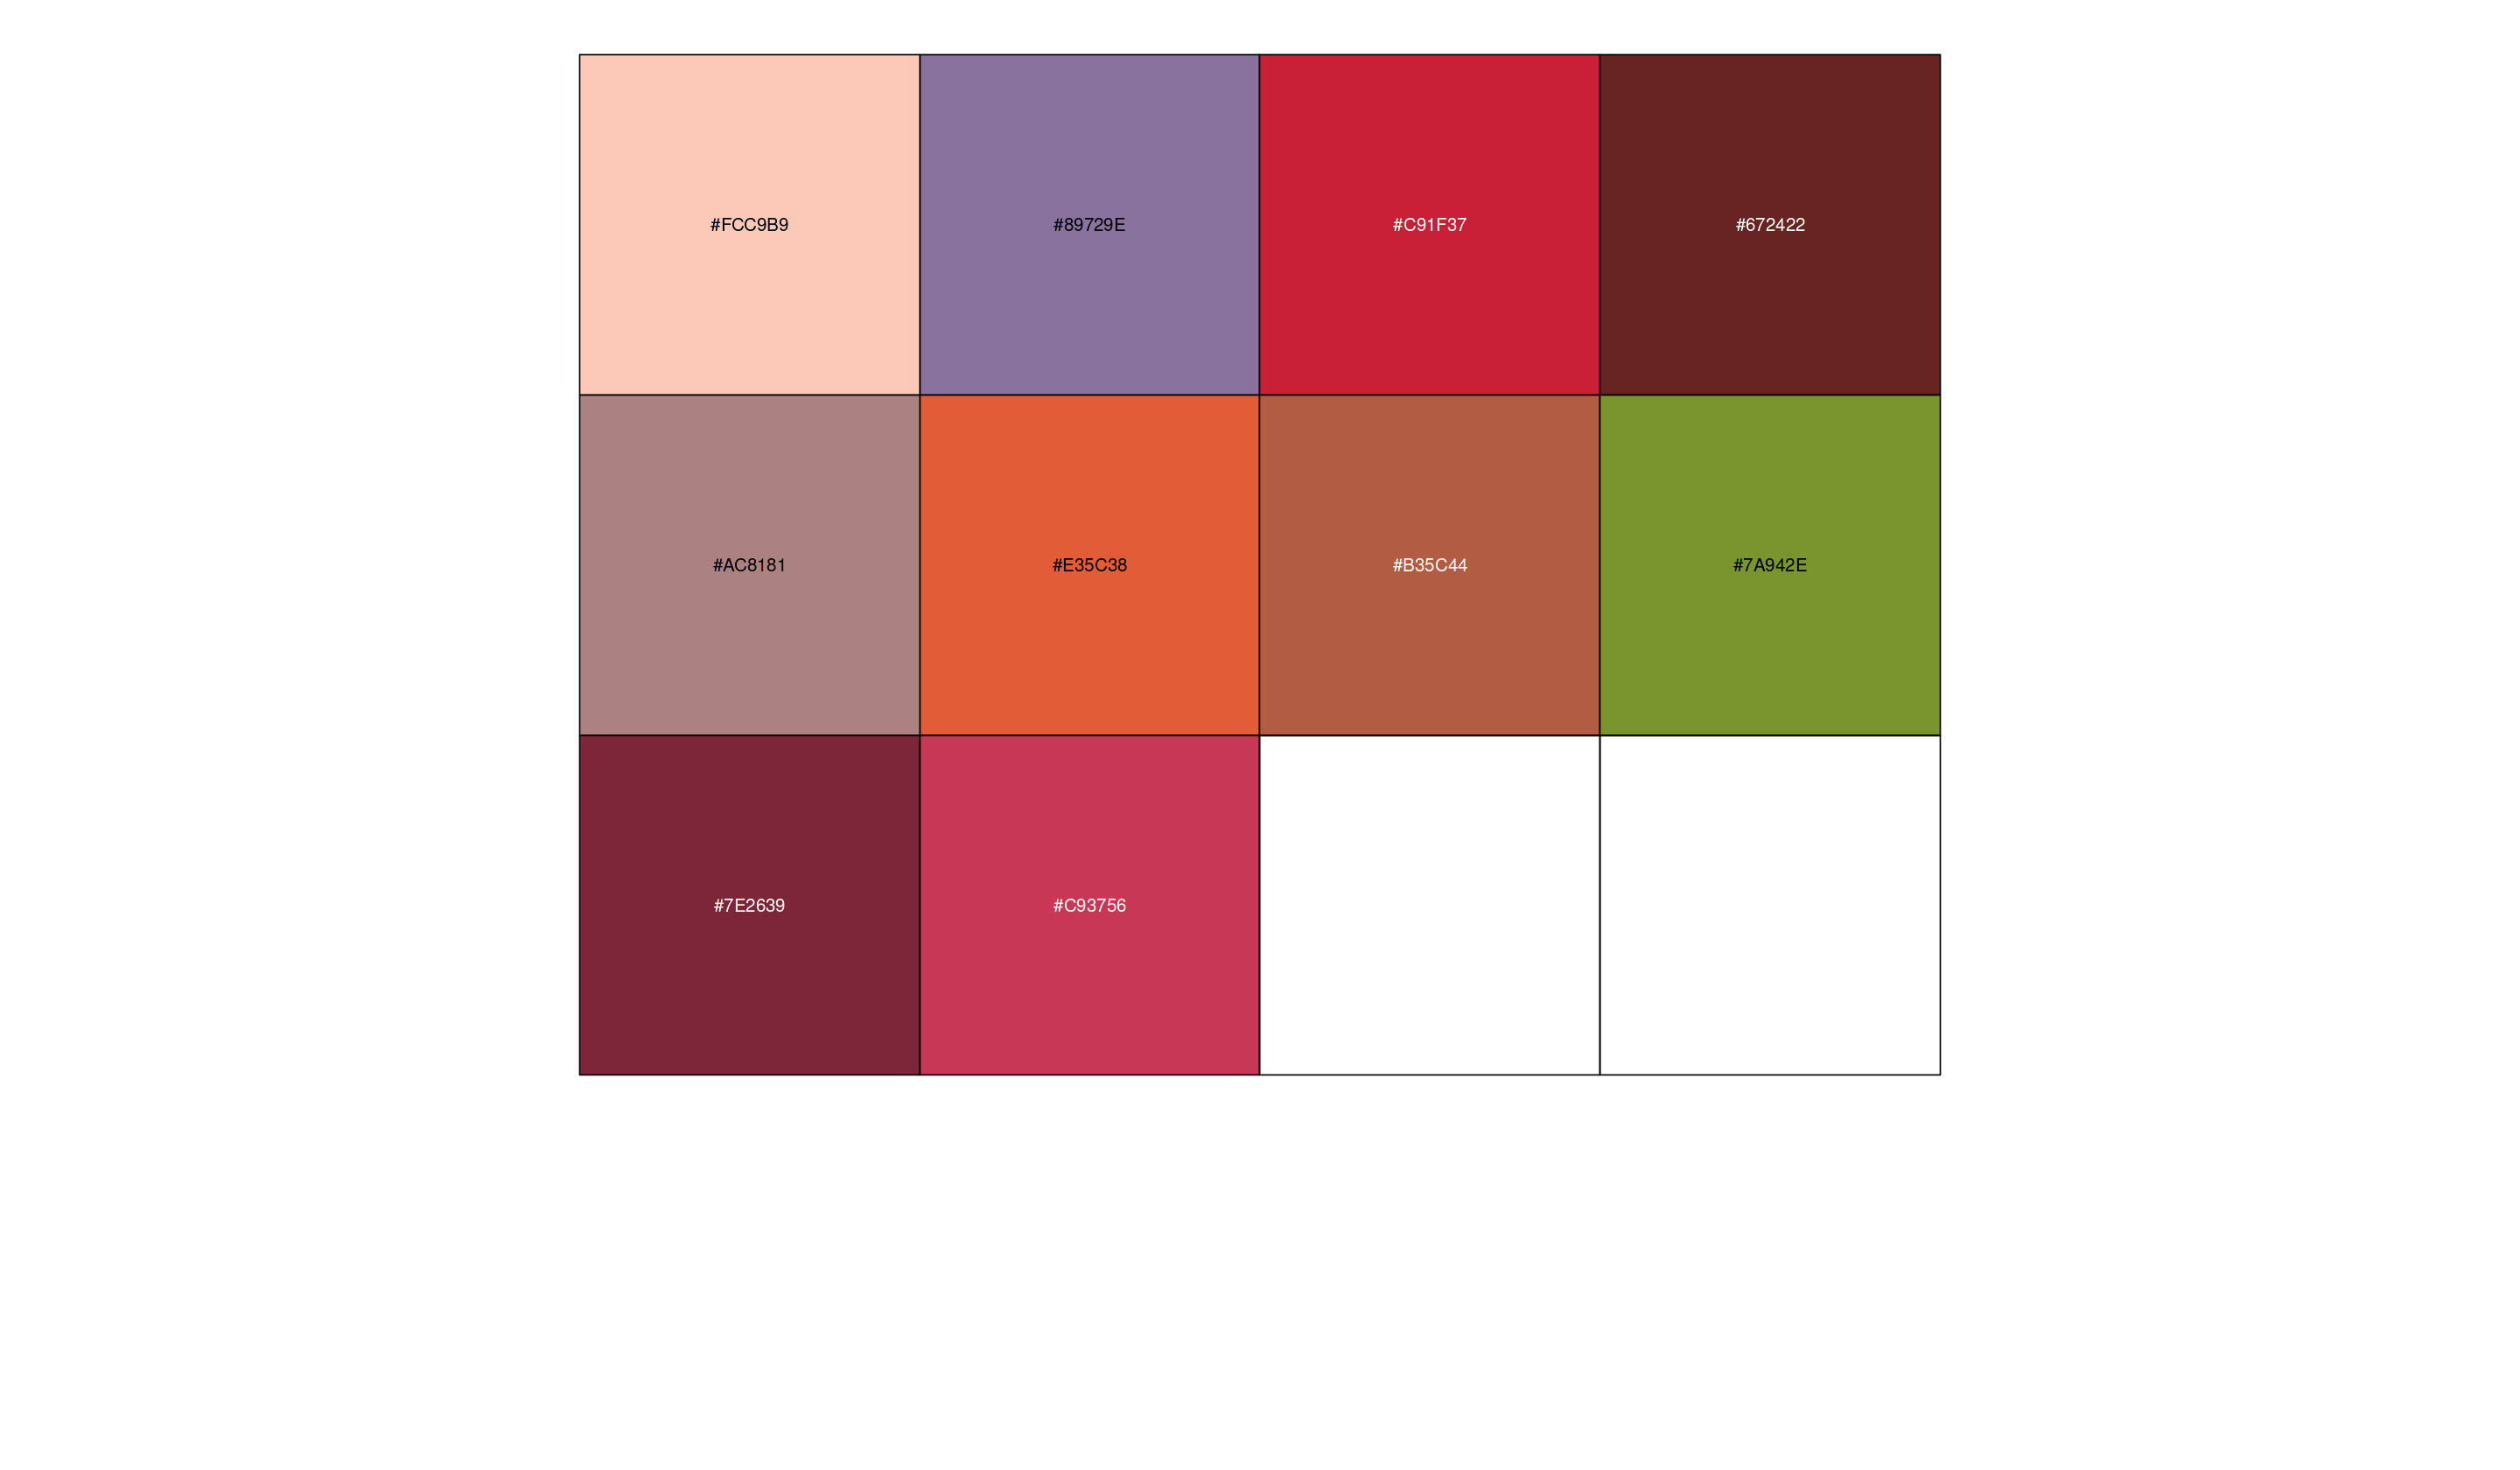

In [45]:
kColor1 <- "#F08F90" # 一斤染
kColor2 <- "#7A942E" # 鶸萌黄
kColor3 <- "#875F9A" # 藤紫
kColor4 <- "#AC8181"
kColor5 <- '#008080'
kColor6 <- '#800000'
kColor7 <- '#00FFFF'
kColor8 <- '#00FF00'
kColor9 <- '#808000'
kColorPalette10 <- c(
   "#FCC9B9", "#89729E", "#C91F37", "#672422", #桜色, 藤色, 唐紅, 小豆色
   "#AC8181", "#E35C38", "#B35C44", "#7A942E", #桜鼠, 蘇比, 唐茶, 鶸萌黄
   "#7E2639", "#C93756") #蘇芳, 中紅
 show_col(kColorPalette10)

options(scipen=999)
kLegPadX <- 0.02
kLegPadY <- 1 - 0.04

In [70]:
# library(ggplot2)

# # Set the size of the figure
# figure_width <- 24  # Adjust the width as desired
# figure_height <- 14  # Adjust the height as desired

# # Modify the graphics device settings
# options(repr.plot.width = figure_width, repr.plot.height = figure_height)

# # Increase font size for text and numbers
# font_size <- 20

# plot <- ggplot(data = aggData, aes(x = Year, y = Value, fill = exp_imp)) +
#   geom_bar(stat = "identity") +
#   labs(title = "Imports/Exports", y = paste0("JPY (x", format(kYenFactor * factor, nsmall = 0, big.mark = ",", digits = 0), ")")) +
#   scale_x_continuous(breaks = aggData$Year) +
#   guides(fill = guide_legend(title = NULL)) +
#   scale_fill_manual(values = c("exports" = "#E35C38", "imports" = kColor5)) +
#   theme(text = element_text(size = font_size),  # Increase font size
#         axis.text.x = element_text(angle = 90, hjust = 1, size = font_size),  # Increase font size for x-axis text
#         axis.text.y = element_text(size = font_size),  # Increase font size for y-axis text
#         legend.justification = c(0, 1), legend.position = c(kLegPadX, kLegPadY),
#         legend.key.size = unit(2, "lines"),  # Adjust the size of the legend key
#         legend.text = element_text(size = font_size))  # Increase font size for legend text

# # Hiển thị biểu đồ
# print(plot)


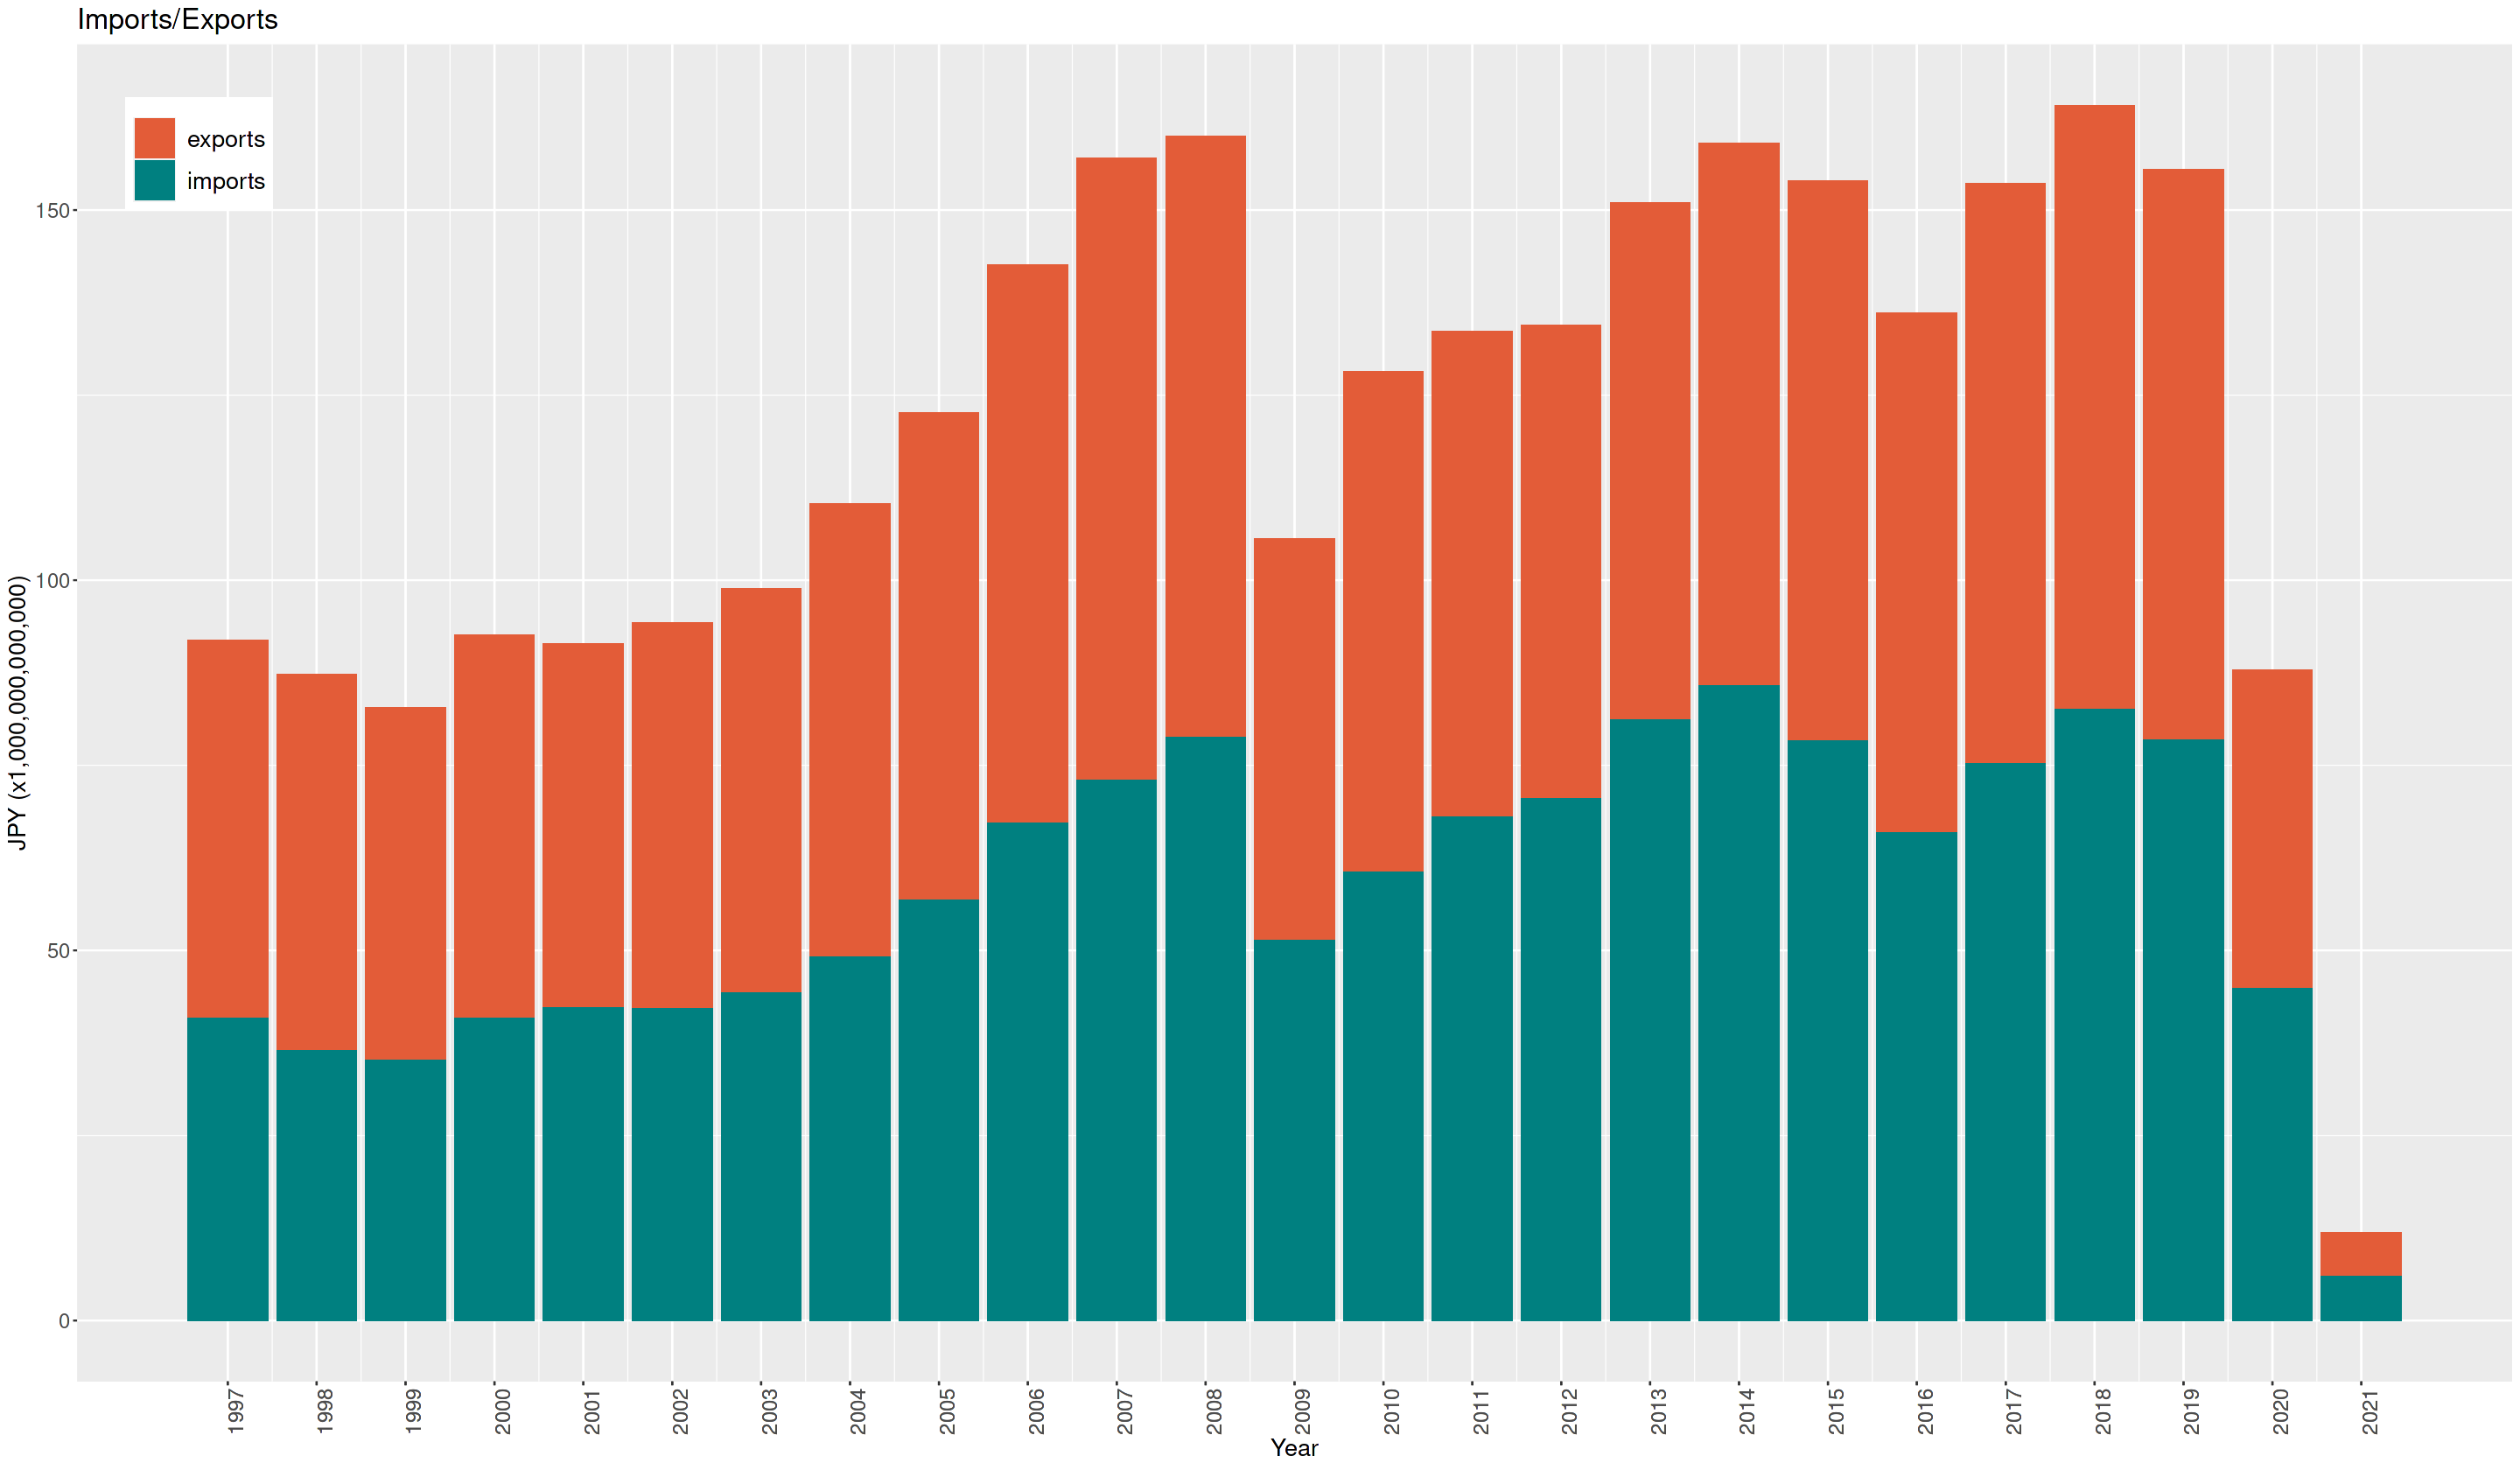

In [69]:
data <- melt(
  setNames(
    data.table(Y[["Value"]], Y[["Year"]], Y[["exp_imp"]]), 
    c("Value", "Year", "exp_imp")),
  measure.vars = c("Value"), value.name = "Value")

# aggData <- as.data.table(aggregate(Value ~ exp_imp + Year , data = data, FUN = sum))
# same as using `aggregate`, but faster
aggData <- data[, .(Value = sum(Value)), by = c("exp_imp", "Year")]
aggData <- aggData[order(Year)]
aggData[, exp_imp := as.factor(exp_imp)]
levels(aggData$exp_imp) <- c("exports", "imports")

factor <- 1000000
aggData[, Value := Value / factor]

# Set the size of the figure
figure_width <- 18  # Adjust the width as desired
figure_height <- 12  # Adjust the height as desired

# Tăng kích thước hiển thị chữ và số trên biểu đồ
plot <- ggplot(data = aggData, aes(x = Year, y = Value, fill = exp_imp)) +
  geom_bar(stat = "identity") +
  labs(title = "Imports/Exports", y = paste0(
    "JPY (x", format(kYenFactor * factor, nsmall = 0, big.mark = ",", digits = 0), ")")) +
  scale_x_continuous(breaks = aggData$Year) +
  guides(fill = guide_legend(title = NULL)) +
  scale_fill_manual(values = c("exports" = "#E35C38", "imports" = kColor5)) +
  theme(text = element_text(size = 16),  # Tăng kích thước chữ chung
        axis.text.x = element_text(angle = 90, hjust = 1, size = 14),  # Tăng kích thước chữ trục x
        axis.text.y = element_text(size = 14),  # Tăng kích thước chữ trục y
        legend.justification = c(0, 1), legend.position = c(kLegPadX, kLegPadY),
        legend.key.size = unit(2, "lines"),  # Điều chỉnh kích thước khung chú giải
        legend.text = element_text(size = 16))  # Tăng kích thước chữ chú giải
# Set the size of the figure
figure_width <- 24  # Adjust the width as desired
figure_height <- 14  # Adjust the height as desired

# Modify the graphics device settings
options(repr.plot.width = figure_width, repr.plot.height = figure_height)

# Hiển thị biểu đồ
print(plot)


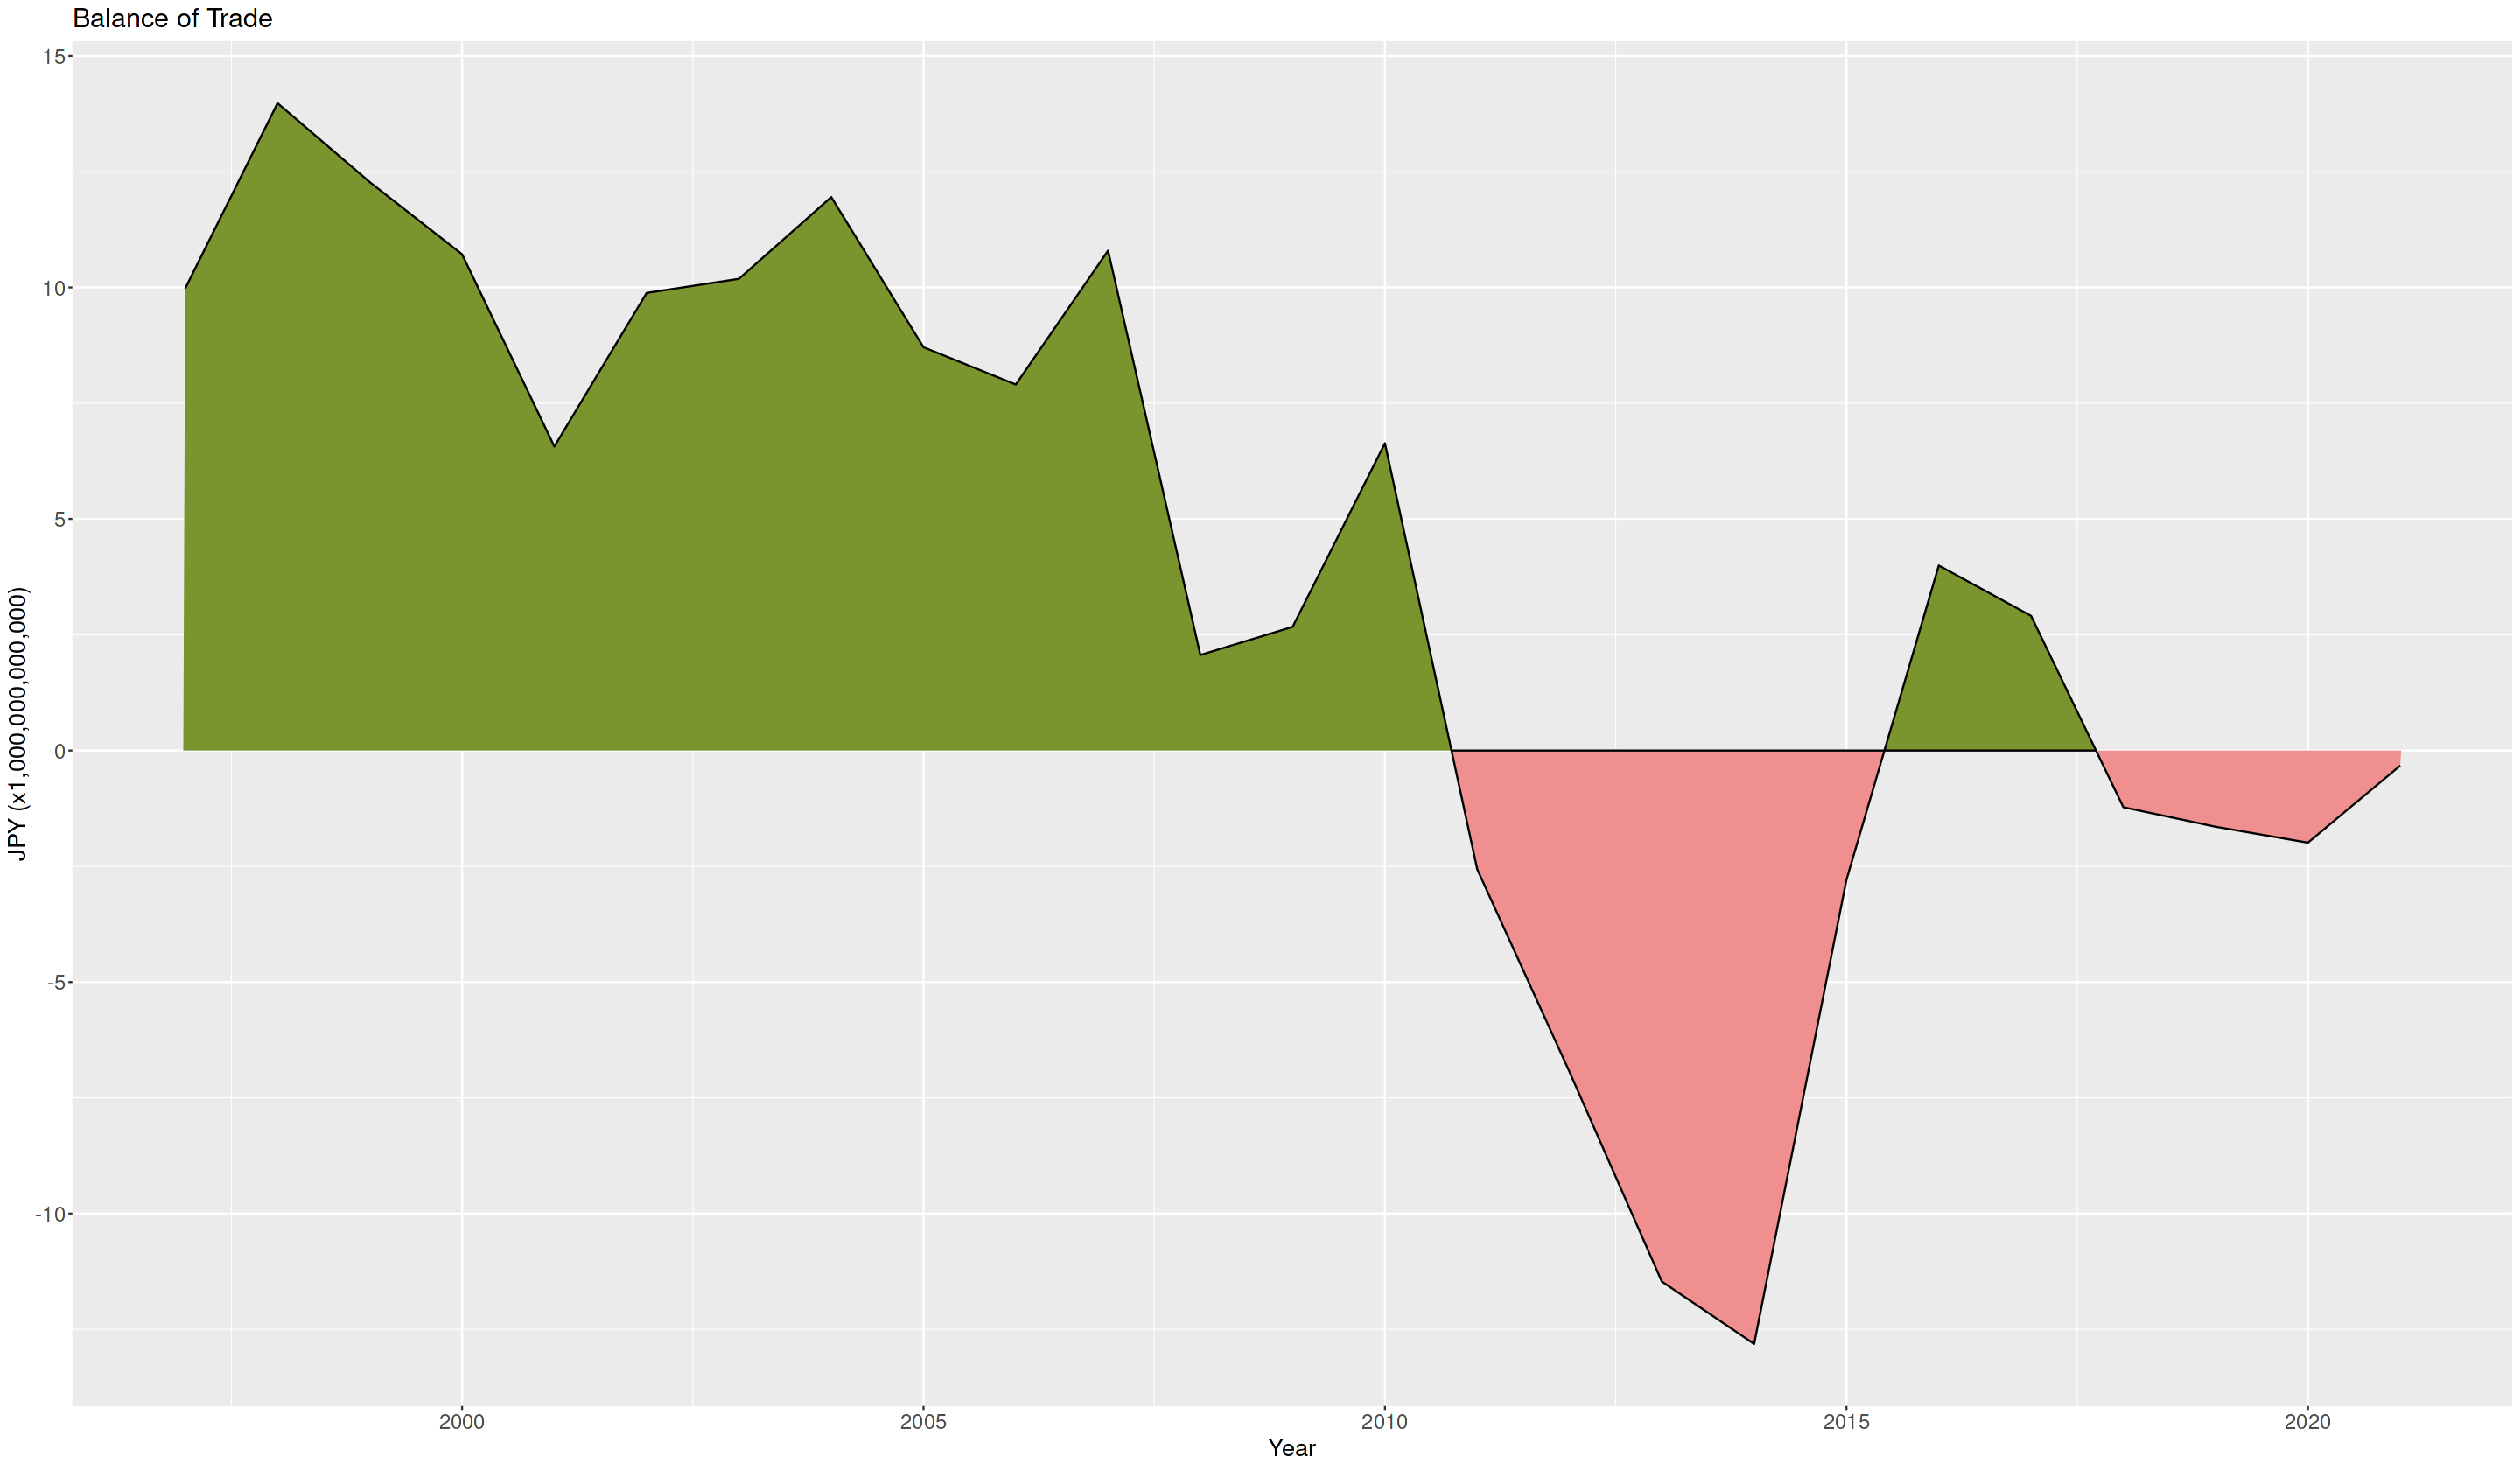

In [47]:
data <- melt(
  setNames(
    data.table(Y[["Value"]], Y[["Year"]], Y[["exp_imp"]]), 
    c("Value", "Year", "exp_imp")),
  measure.vars = c("Value"), value.name = "Value")

# aggData <- as.data.table(aggregate(Value ~ exp_imp + Year , data = data, FUN = sum))
# same as using `aggregate`, but faster
aggData <- data[, .(Value = sum(Value)), by = c("exp_imp", "Year")]
aggData <- aggData[order(Year)]
aggData[, exp_imp := as.factor(exp_imp)]
levels(aggData$exp_imp) <- c("exports", "imports")

aggDataExport <- aggData[exp_imp == "exports", ]
aggDataImport <- aggData[exp_imp == "imports", ]

aggData <- aggData[exp_imp == "exports", ]
aggData[, balance_of_trade := aggDataExport$Value - aggDataImport$Value]

factor <- 1000000
aggData[, balance_of_trade := balance_of_trade / factor]

# https://stackoverflow.com/a/18009173
rx <- do.call("rbind",
   sapply(1:(nrow(aggData)-1), function(i){
   f <- lm(Year~balance_of_trade, aggData[i:(i+1),])
   if (f$qr$rank < 2) return(NULL)
   r <- predict(f, newdata = data.frame(balance_of_trade = 0))
   if(aggData[i,]$Year < r & r < aggData[i+1,]$Year)
      return(data.frame(Year = r, balance_of_trade = 0))
    else return(NULL)
 }))
 aggData <- rbind(aggData, rx, fill=TRUE)

figure_width <- 24  # Adjust the width as desired
figure_height <- 14  # Adjust the height as desired

# Modify the graphics device settings
options(repr.plot.width = figure_width, repr.plot.height = figure_height)

# Create the plot
# Tăng kích thước hiển thị chữ và số, cũng như tiêu đề của các nhãn trục
plot <- ggplot(aggData, aes(x = Year, y = balance_of_trade, fill = exp_imp)) + 
  geom_area(data = subset(aggData, balance_of_trade <= 0), fill = kColor1) + 
  geom_area(data = subset(aggData, balance_of_trade >= 0), fill = kColor2) +
  labs(title = "Balance of Trade", 
       y = paste0("JPY (x", format(kYenFactor * factor, nsmall = 0, big.mark = ",", digits = 0), ")")) +
  geom_line() +
  scale_fill_manual(values = c("exports" = kColor1, "imports" = kColor2)) +
  theme(legend.key.size = unit(2, "lines"),  # Điều chỉnh kích thước khung chú giải
        legend.text = element_text(size = 16),  # Tăng kích thước chữ chú giải
        axis.title = element_text(size = 16),  # Tăng kích thước chữ tiêu đề trục
        axis.text = element_text(size = 14),  # Tăng kích thước chữ trục
        plot.title = element_text(size = 18))  # Tăng kích thước chữ tiêu đề biểu đồ

# Hiển thị biểu đồ
print(plot)


# Energy Crisis (1997 - 2020)

In [48]:
hs4Coal <- c(2701)
hs4Oil <- c(2709, 2710)
hs4Gas <- c(2711)
hs4FossilEnergyRelated <- c(hs4Coal, hs4Oil, hs4Gas) 


In [49]:
hs4Coal <- c(2701)
hs4Oil <- c(2709, 2710)
hs4Gas <- c(2711)
hs4FossilEnergyRelated <- c(hs4Coal, hs4Oil, hs4Gas)

energyTrade <- Y[which(Y$hs4 %in% hs4FossilEnergyRelated), ]

# Extract the desired columns and remove duplicates
energyTradeUnique <- unique(energyTrade[, .(hs4, gsub("_", " ", hs4_name))])

# Rename the columns
colNames <- c("HS Code", "Description")
names(energyTradeUnique) <- colNames

# Generate the table as a character string
table_str <- knitr::kable(energyTradeUnique, format = "simple", row.names = FALSE, align = c("l", "l"))

# Display the table
# cat(table_str)
table_str



HS Code   Description                                                                                                                                                                                                                                                                                             
--------  --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
2701      Coal; briquettes  ovoids and similar solid fuels manufactured from coal                                                                                                                                                                                                                                 
2709      Petroleum oils and oils obtained from bituminous minerals  crude   

In [50]:
beginYr <- 2015
endYr <- 2021

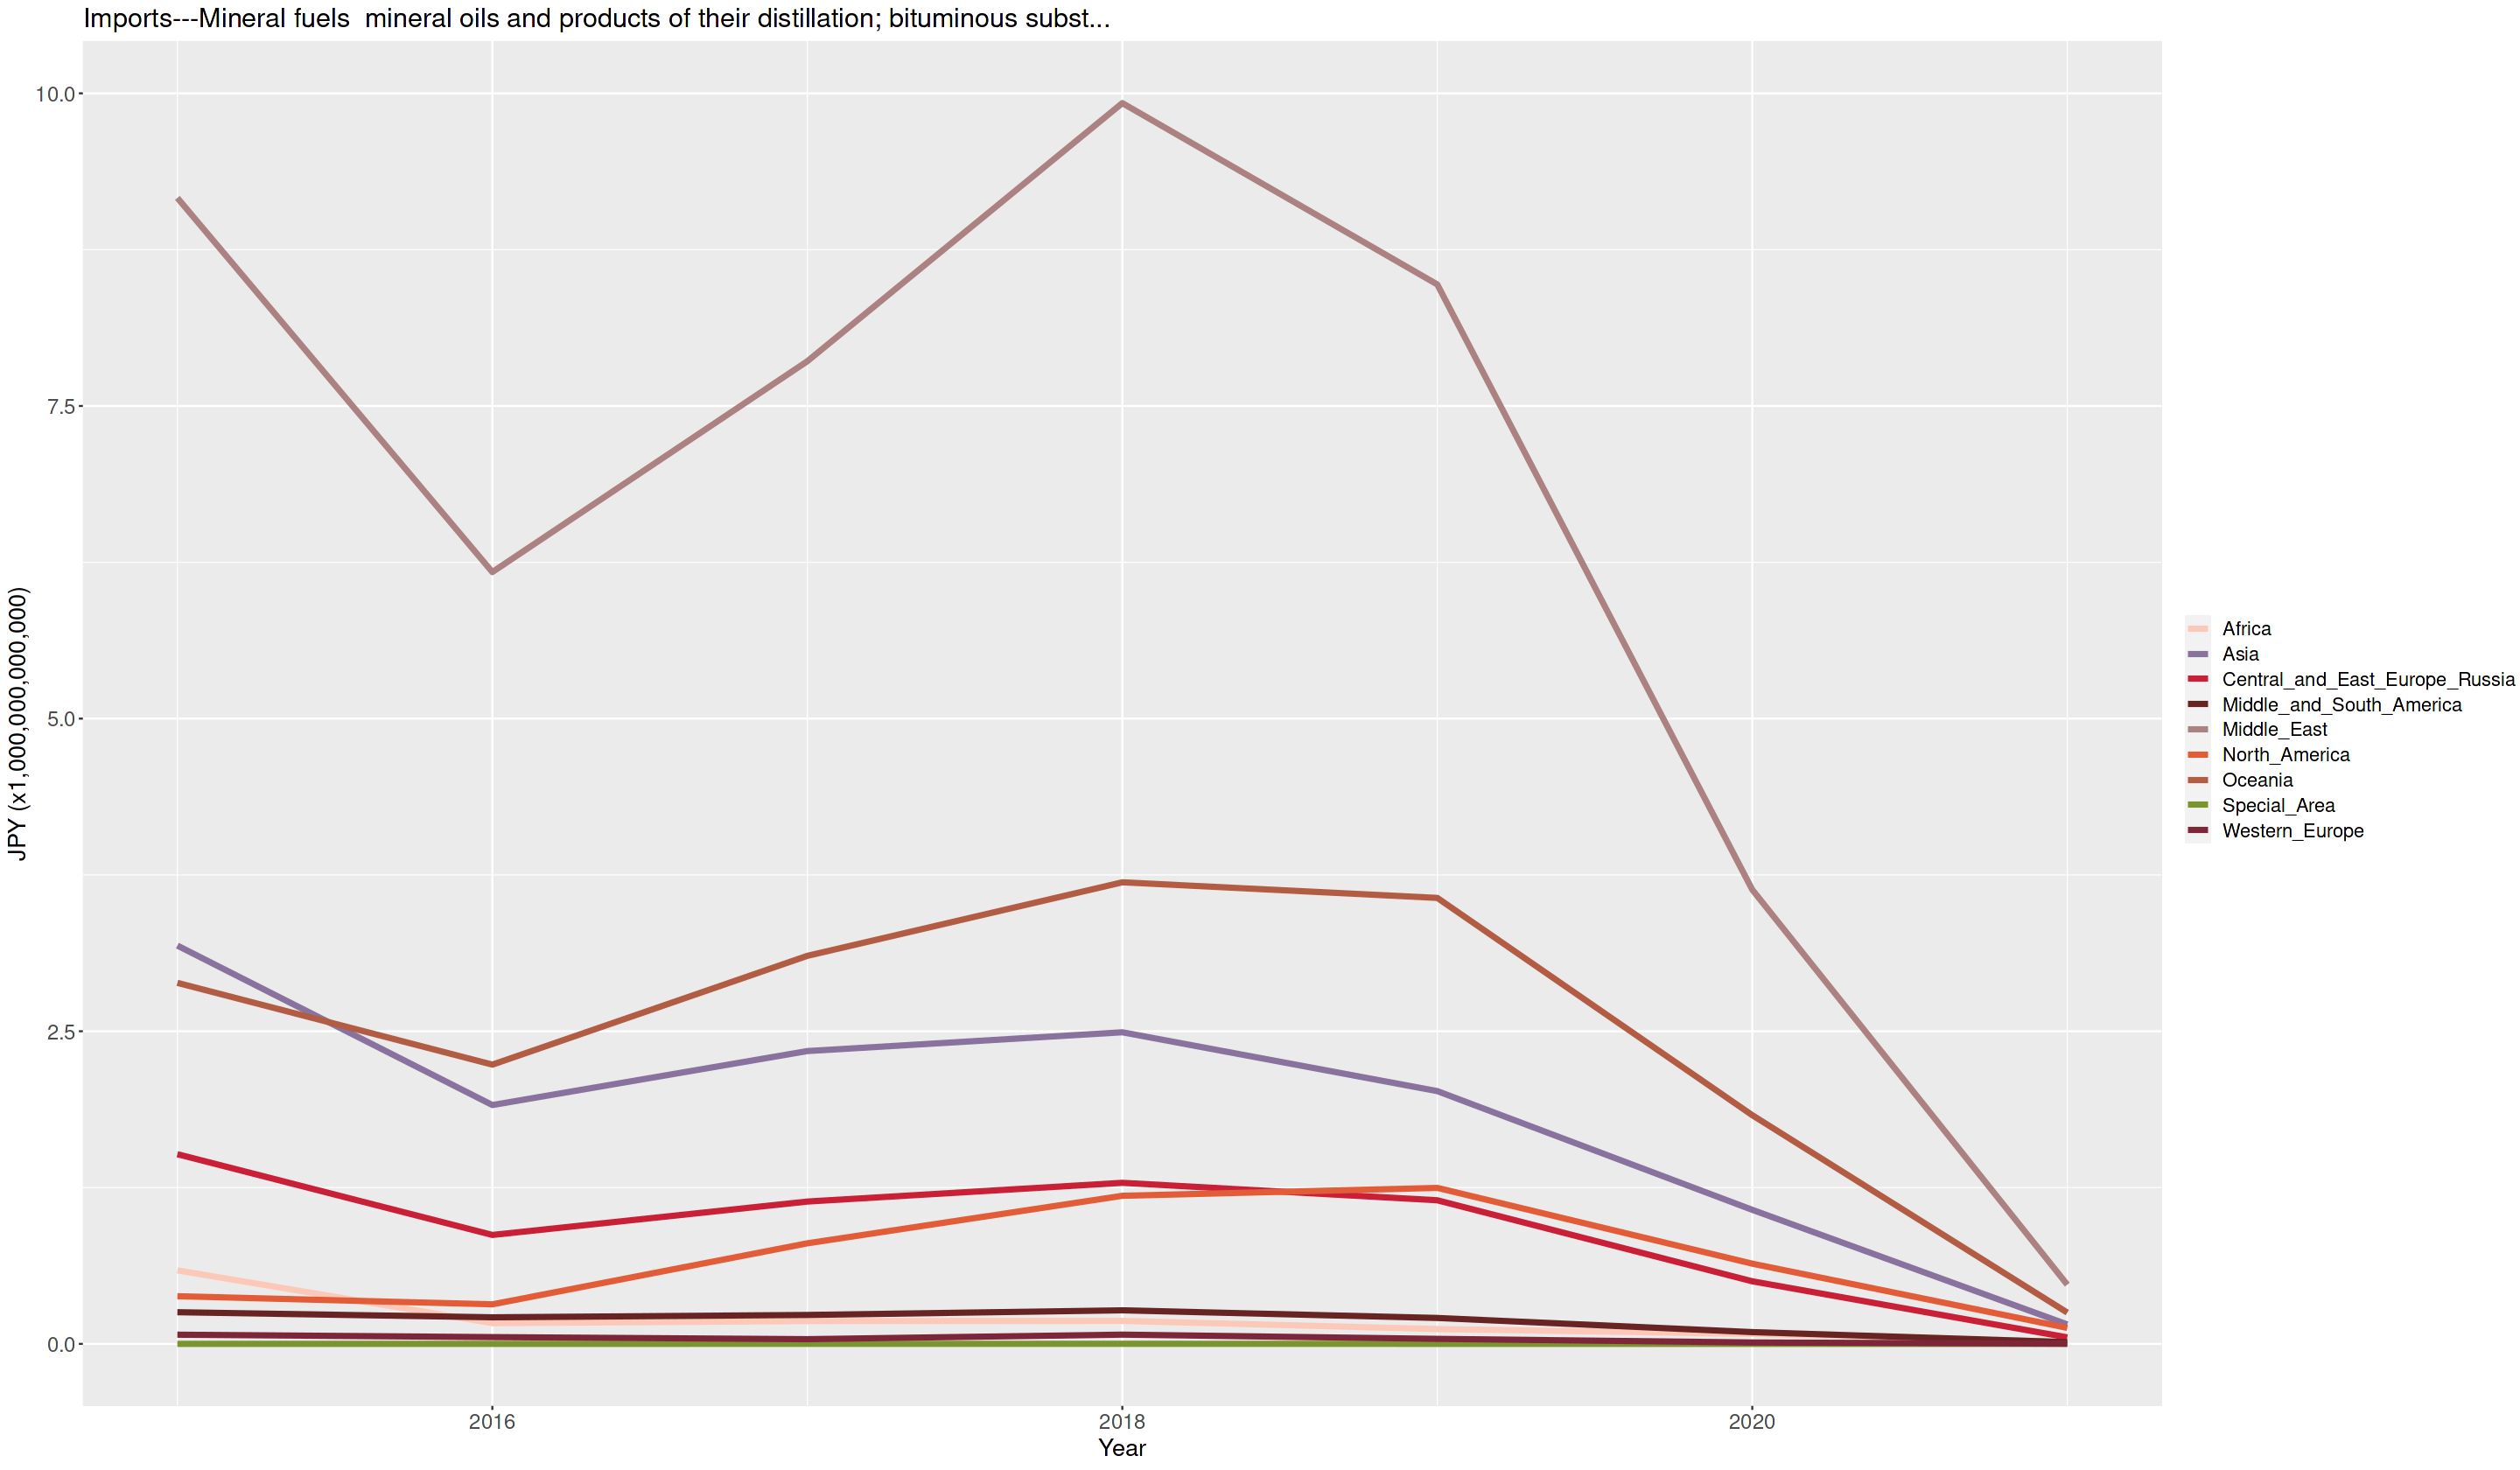

In [51]:
data <- melt(
  setNames(
    data.table(energyTrade[["Value"]], 
               energyTrade[["Year"]], 
               energyTrade[["Area"]], 
               energyTrade[["exp_imp"]]), 
    c("Value", "Year", "Area", "exp_imp")),
  measure.vars = c("Value"), value.name = "Value")

data <- data[Year >= beginYr & Year <= endYr, ]
data <- data[exp_imp == 2, ] # imports
aggData <- as.data.table(aggregate(Value ~ Area + Year, data = data, FUN = sum))

figure_width <- 20  # Adjust the width as desired
figure_height <- 14  # Adjust the height as desired

factor <- 1000000
aggData[, Value := Value / factor]

# Tăng kích thước hiển thị chữ và số, cũng như tiêu đề của các nhãn trục
plot <- ggplot(data = aggData, aes(x = Year, y = Value, color = Area)) +
  geom_line(linewidth = 1.5) +
  labs(title = paste0("Imports---", substr(energyTrade$hs2_name[1], 1, 80), "..."), 
       y = paste0("JPY (x", format(kYenFactor * factor, nsmall = 0, big.mark = ",", digits = 0), ")")) +
  scale_color_manual(values = kColorPalette10) +
  theme(text = element_text(size = 16),  # Tăng kích thước chữ trên biểu đồ
        axis.title = element_text(size = 16),  # Tăng kích thước chữ tiêu đề trục
        axis.text = element_text(size = 14),  # Tăng kích thước chữ trục
        plot.title = element_text(size = 18),  # Tăng kích thước chữ tiêu đề biểu đồ
        legend.title = element_blank(),  # Ẩn tiêu đề chú giải
        legend.background = element_rect(fill = alpha('white', 0.4)))  # Điều chỉnh nền chú giải

# Hiển thị biểu đồ
print(plot)


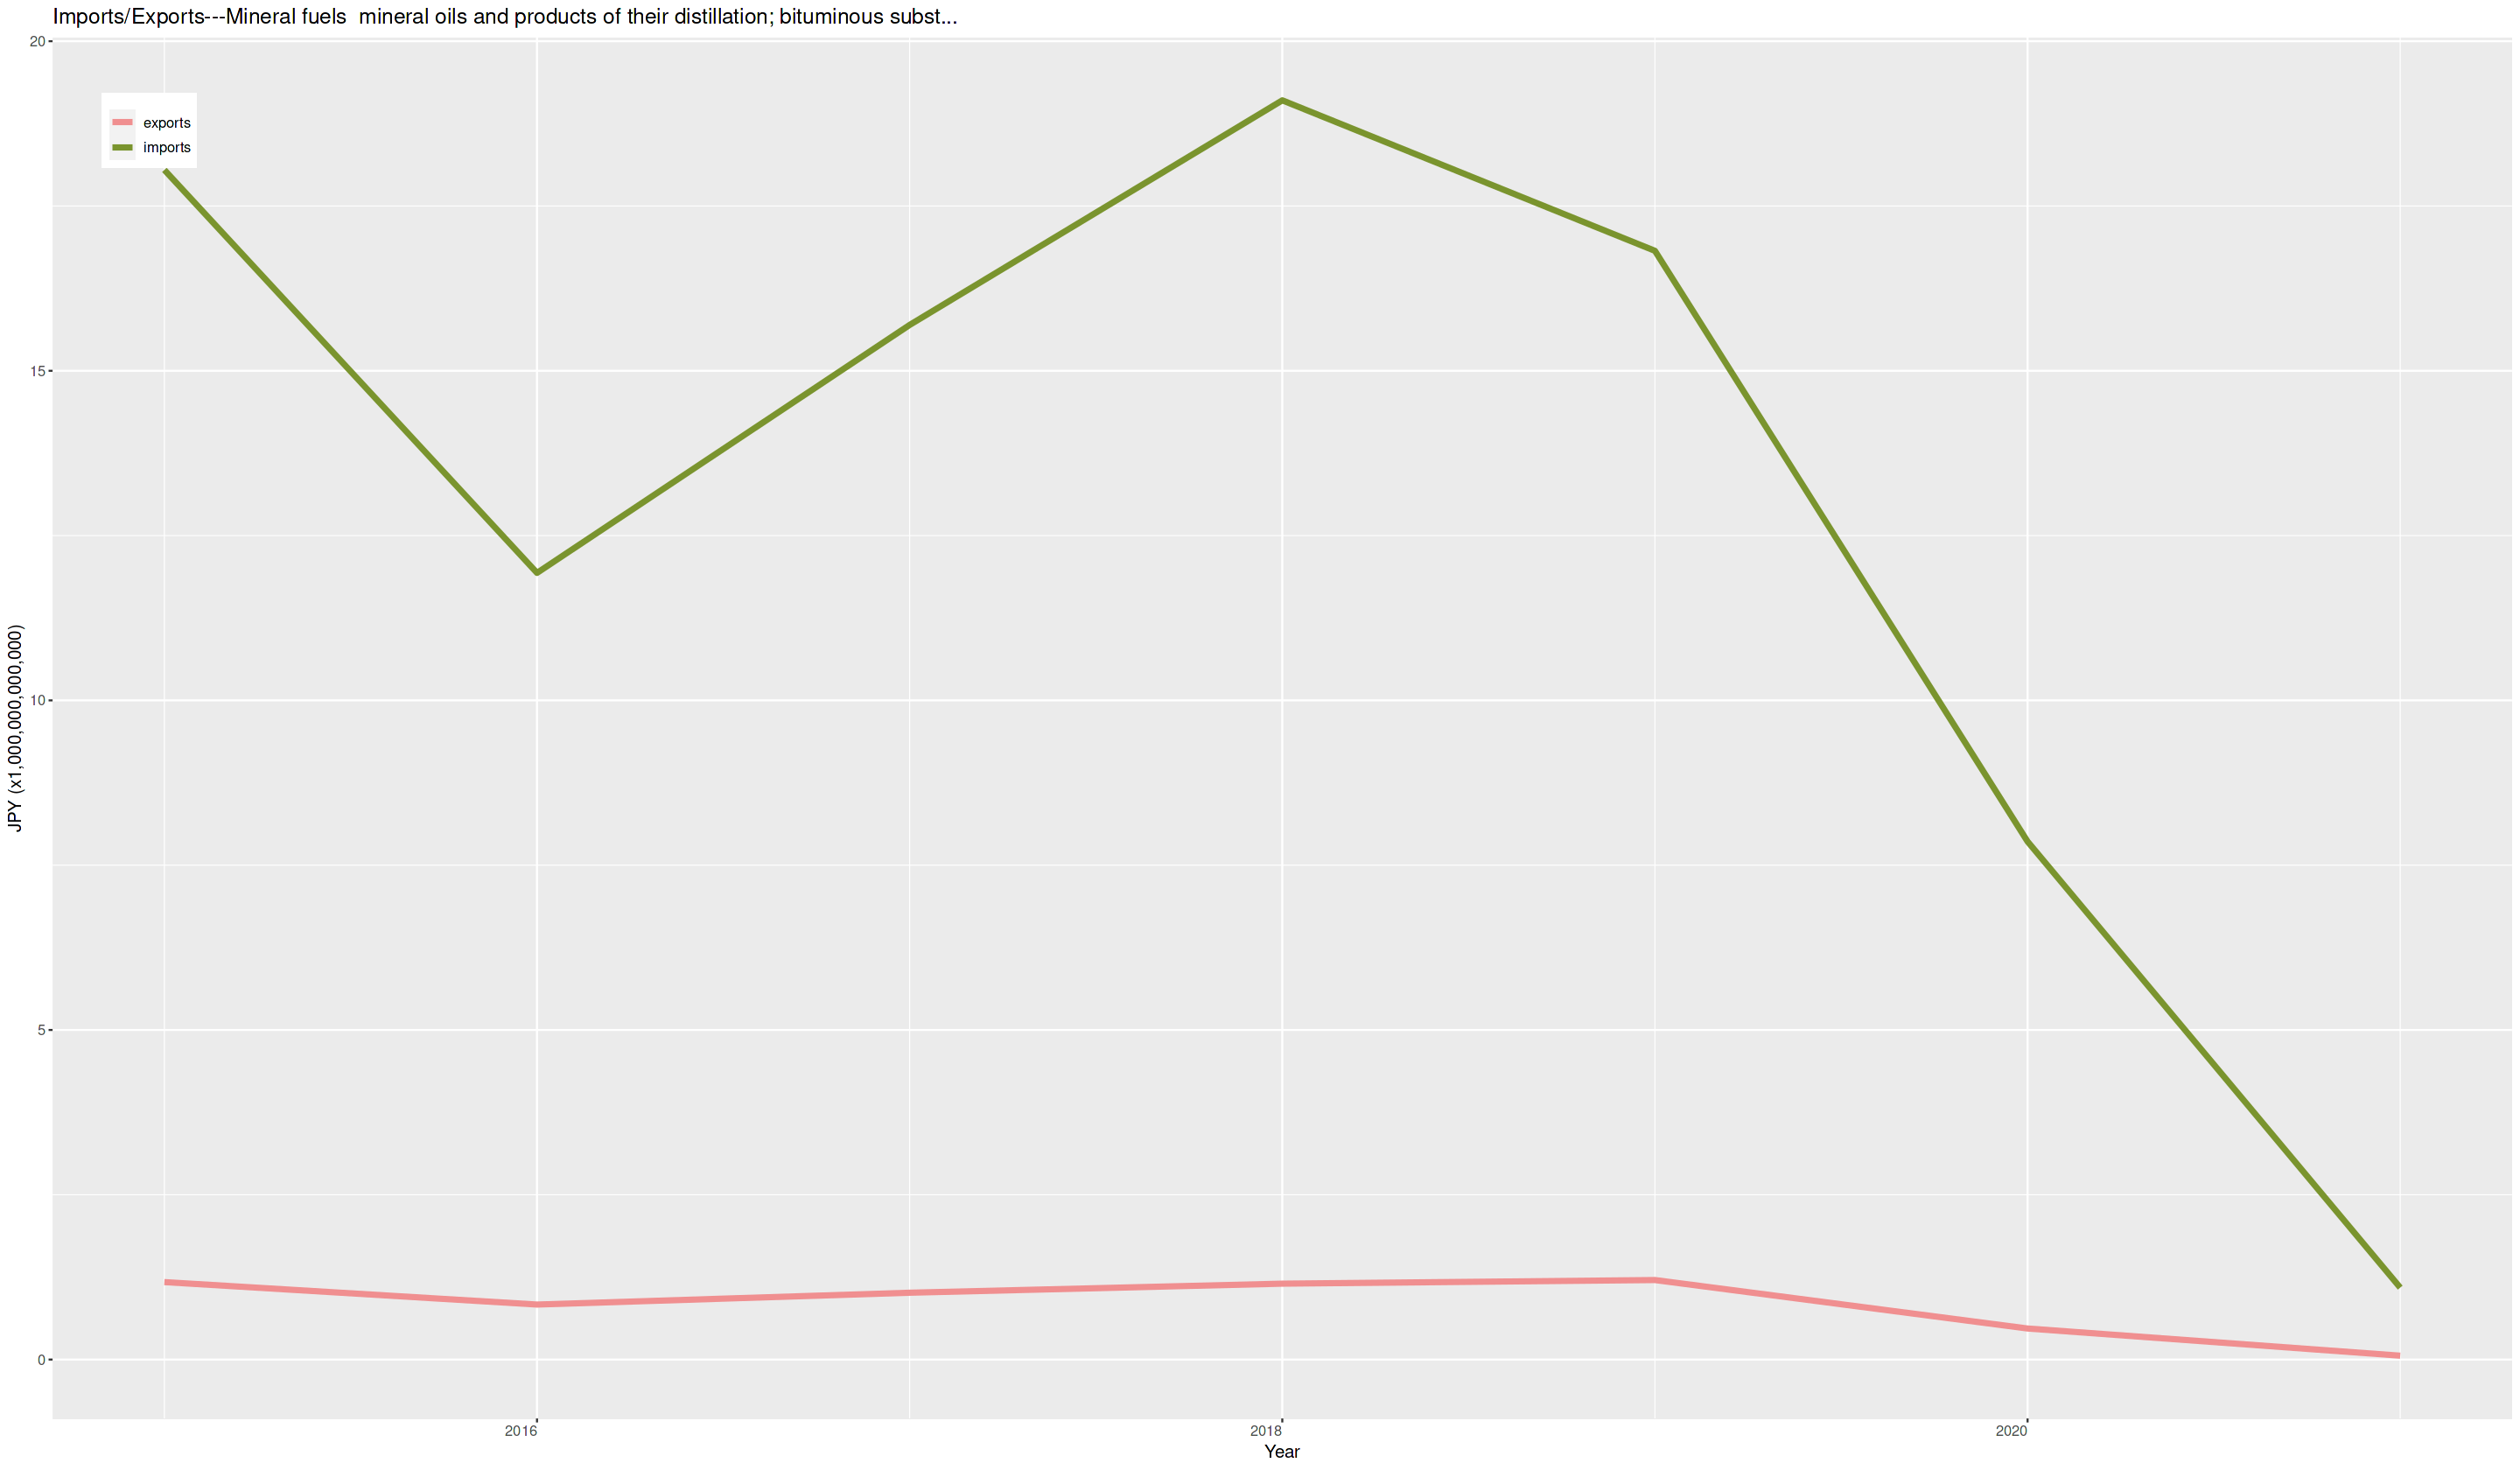

In [52]:
data <- melt(
    setNames(
      data.table(
        energyTrade[["Value"]], 
        energyTrade[["Year"]], 
        energyTrade[["Area"]], 
        energyTrade[["exp_imp"]]), 
      c("Value", "Year", "Area", "exp_imp")),
    measure.vars = c("Value"), value.name = "Value")
figure_width <- 18  # Adjust the width as desired
figure_height <- 12  # Adjust the height as desired

data <- data[Year >= beginYr & Year <= endYr, ]
aggData <- as.data.table(aggregate(Value ~ Year + exp_imp, data = data, FUN = sum))
aggData[, exp_imp := as.factor(exp_imp)]
levels(aggData$exp_imp) <- c("exports", "imports")

factor <- 1000000
aggData[, Value := Value / factor]

ggplot(data=aggData,
       aes(x = Year, y = Value, color = exp_imp)) +
  geom_line(linewidth = 1.5) +  # Update to use `linewidth`
  labs(title = paste0("Imports/Exports---", substr(energyTrade$hs2_name[1], 1, 80), "..."),
       y = paste0(
         "JPY (x", format(kYenFactor * factor, 
                          nsmall = 0, 
                          big.mark = ",", 
                          digits = 0), ")")) +
  scale_color_manual(values = c("exports" = kColor1, "imports" = kColor2)) +
  theme(text = element_text(size = 12), legend.title =  element_blank(),
        axis.text.x = element_text(angle = 0, hjust = 1), 
        legend.justification = c(0, 1), legend.position = c(kLegPadX, kLegPadY))


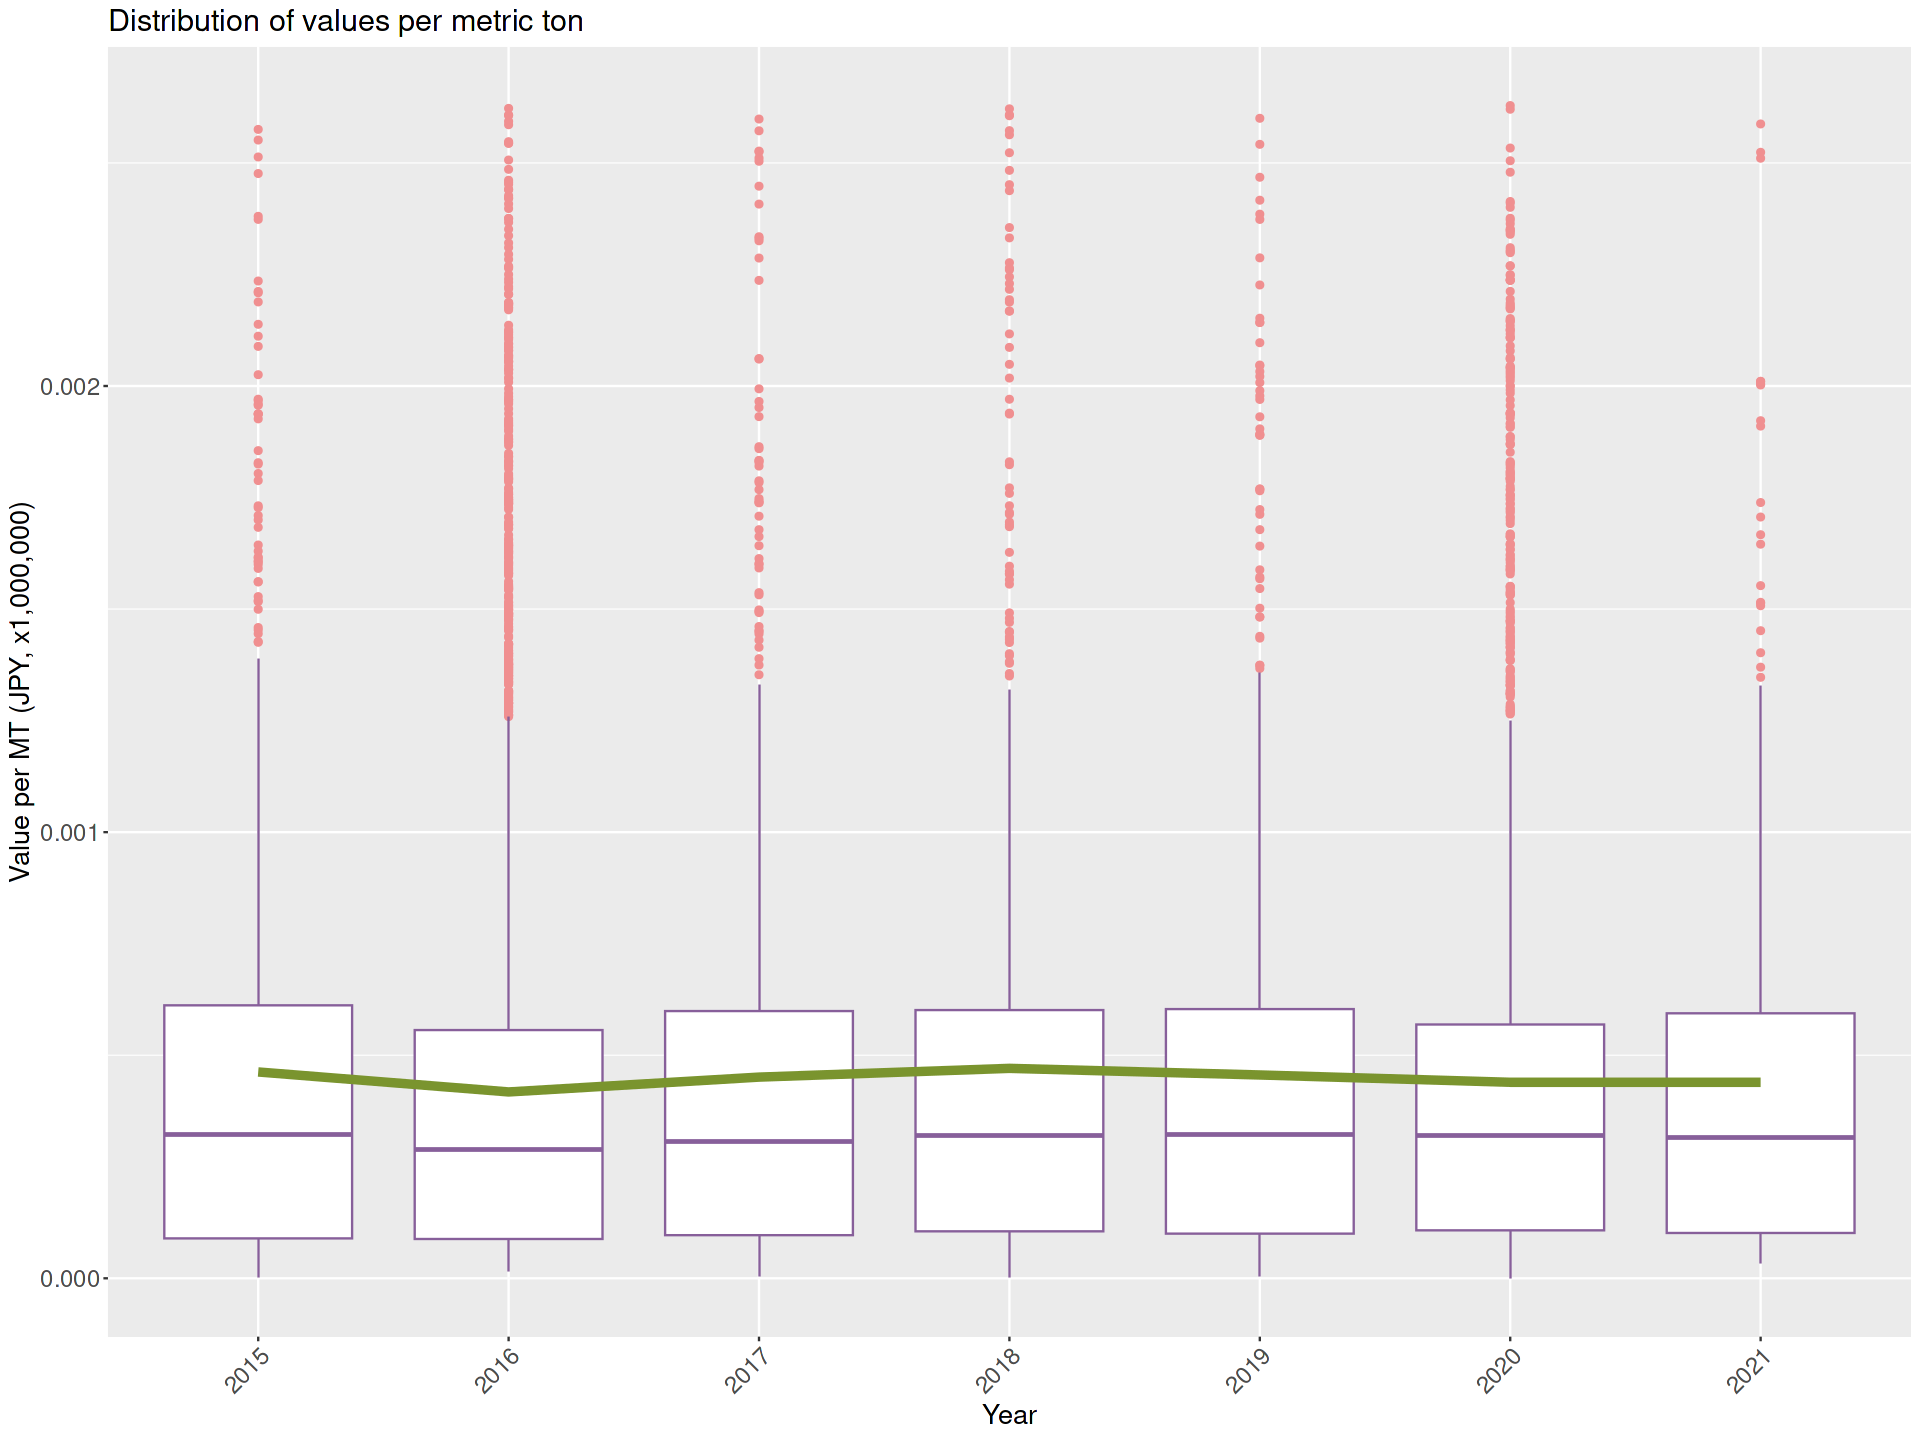

In [68]:
# data <- energyTrade[Year >= beginYr & Year <= endYr, ]
# data <- data[Q1 + Q2 != 0, ]
# data[, value_per_metric_ton := Value / (Q1 + Q2)]

# maxThreshold <- 3 * 1.48 * mad(data$value_per_metric_ton, na.rm = TRUE) 
#                     + median(data$value_per_metric_ton, na.rm = TRUE)
# figure_width <- 20  # Adjust the width as desired
# figure_height <- 14  # Adjust the height as desired
# # to show all the x labels
# data$Year <- as.factor(data$Year)

# ggplot(data[value_per_metric_ton < maxThreshold], aes(x = Year, y = value_per_metric_ton))+
#   #geom_violin(aes(group = Year), adjust = .4, trim = FALSE, color = kColor3) +
#   geom_boxplot(aes(group = Year), color = kColor3, outlier.colour = kColor1, outlier.shape = 19) +
#   labs(title = "Distribution of values per metric ton", y = paste0("Value per MT (JPY, x", format(kYenFactor, nsmall = 0, big.mark = ",", digits = 0), ")")) +
#   stat_summary(fun=mean, aes(group = 1),
#                colour = kColor2, geom = "line", size = 2, show.legend = FALSE) 


data <- energyTrade[Year >= beginYr & Year <= endYr, ]
data <- data[Q1 + Q2 != 0, ]
data[, value_per_metric_ton := Value / (Q1 + Q2)]

maxThreshold <- 3 * 1.48 * mad(data$value_per_metric_ton, na.rm = TRUE) + median(data$value_per_metric_ton, na.rm = TRUE)

figure_width <- 18  # Adjust the width as desired
figure_height <- 12  # Adjust the height as desired

# Convert Year to a factor to show all x labels
data$Year <- as.factor(data$Year)

ggplot(data[data$value_per_metric_ton < maxThreshold], aes(x = Year, y = value_per_metric_ton)) +
  geom_boxplot(aes(group = Year), color = kColor3, outlier.colour = kColor1, outlier.shape = 19) +
  labs(title = "Distribution of values per metric ton", y = paste0("Value per MT (JPY, x", format(kYenFactor, nsmall = 0, big.mark = ",", digits = 0), ")")) +
  stat_summary(fun = mean, aes(group = 1), colour = kColor2, geom = "line", size = 2, show.legend = FALSE) +
  theme(
    text = element_text(size = 16),  # Increase text size
    plot.title = element_text(size = 18),  # Increase plot title size
    axis.title = element_text(size = 16),  # Increase axis title size
    axis.text = element_text(size = 14),  # Increase axis text size
    axis.text.x = element_text(angle = 45, hjust = 1)  # Rotate x-axis labels for better visibility
  )


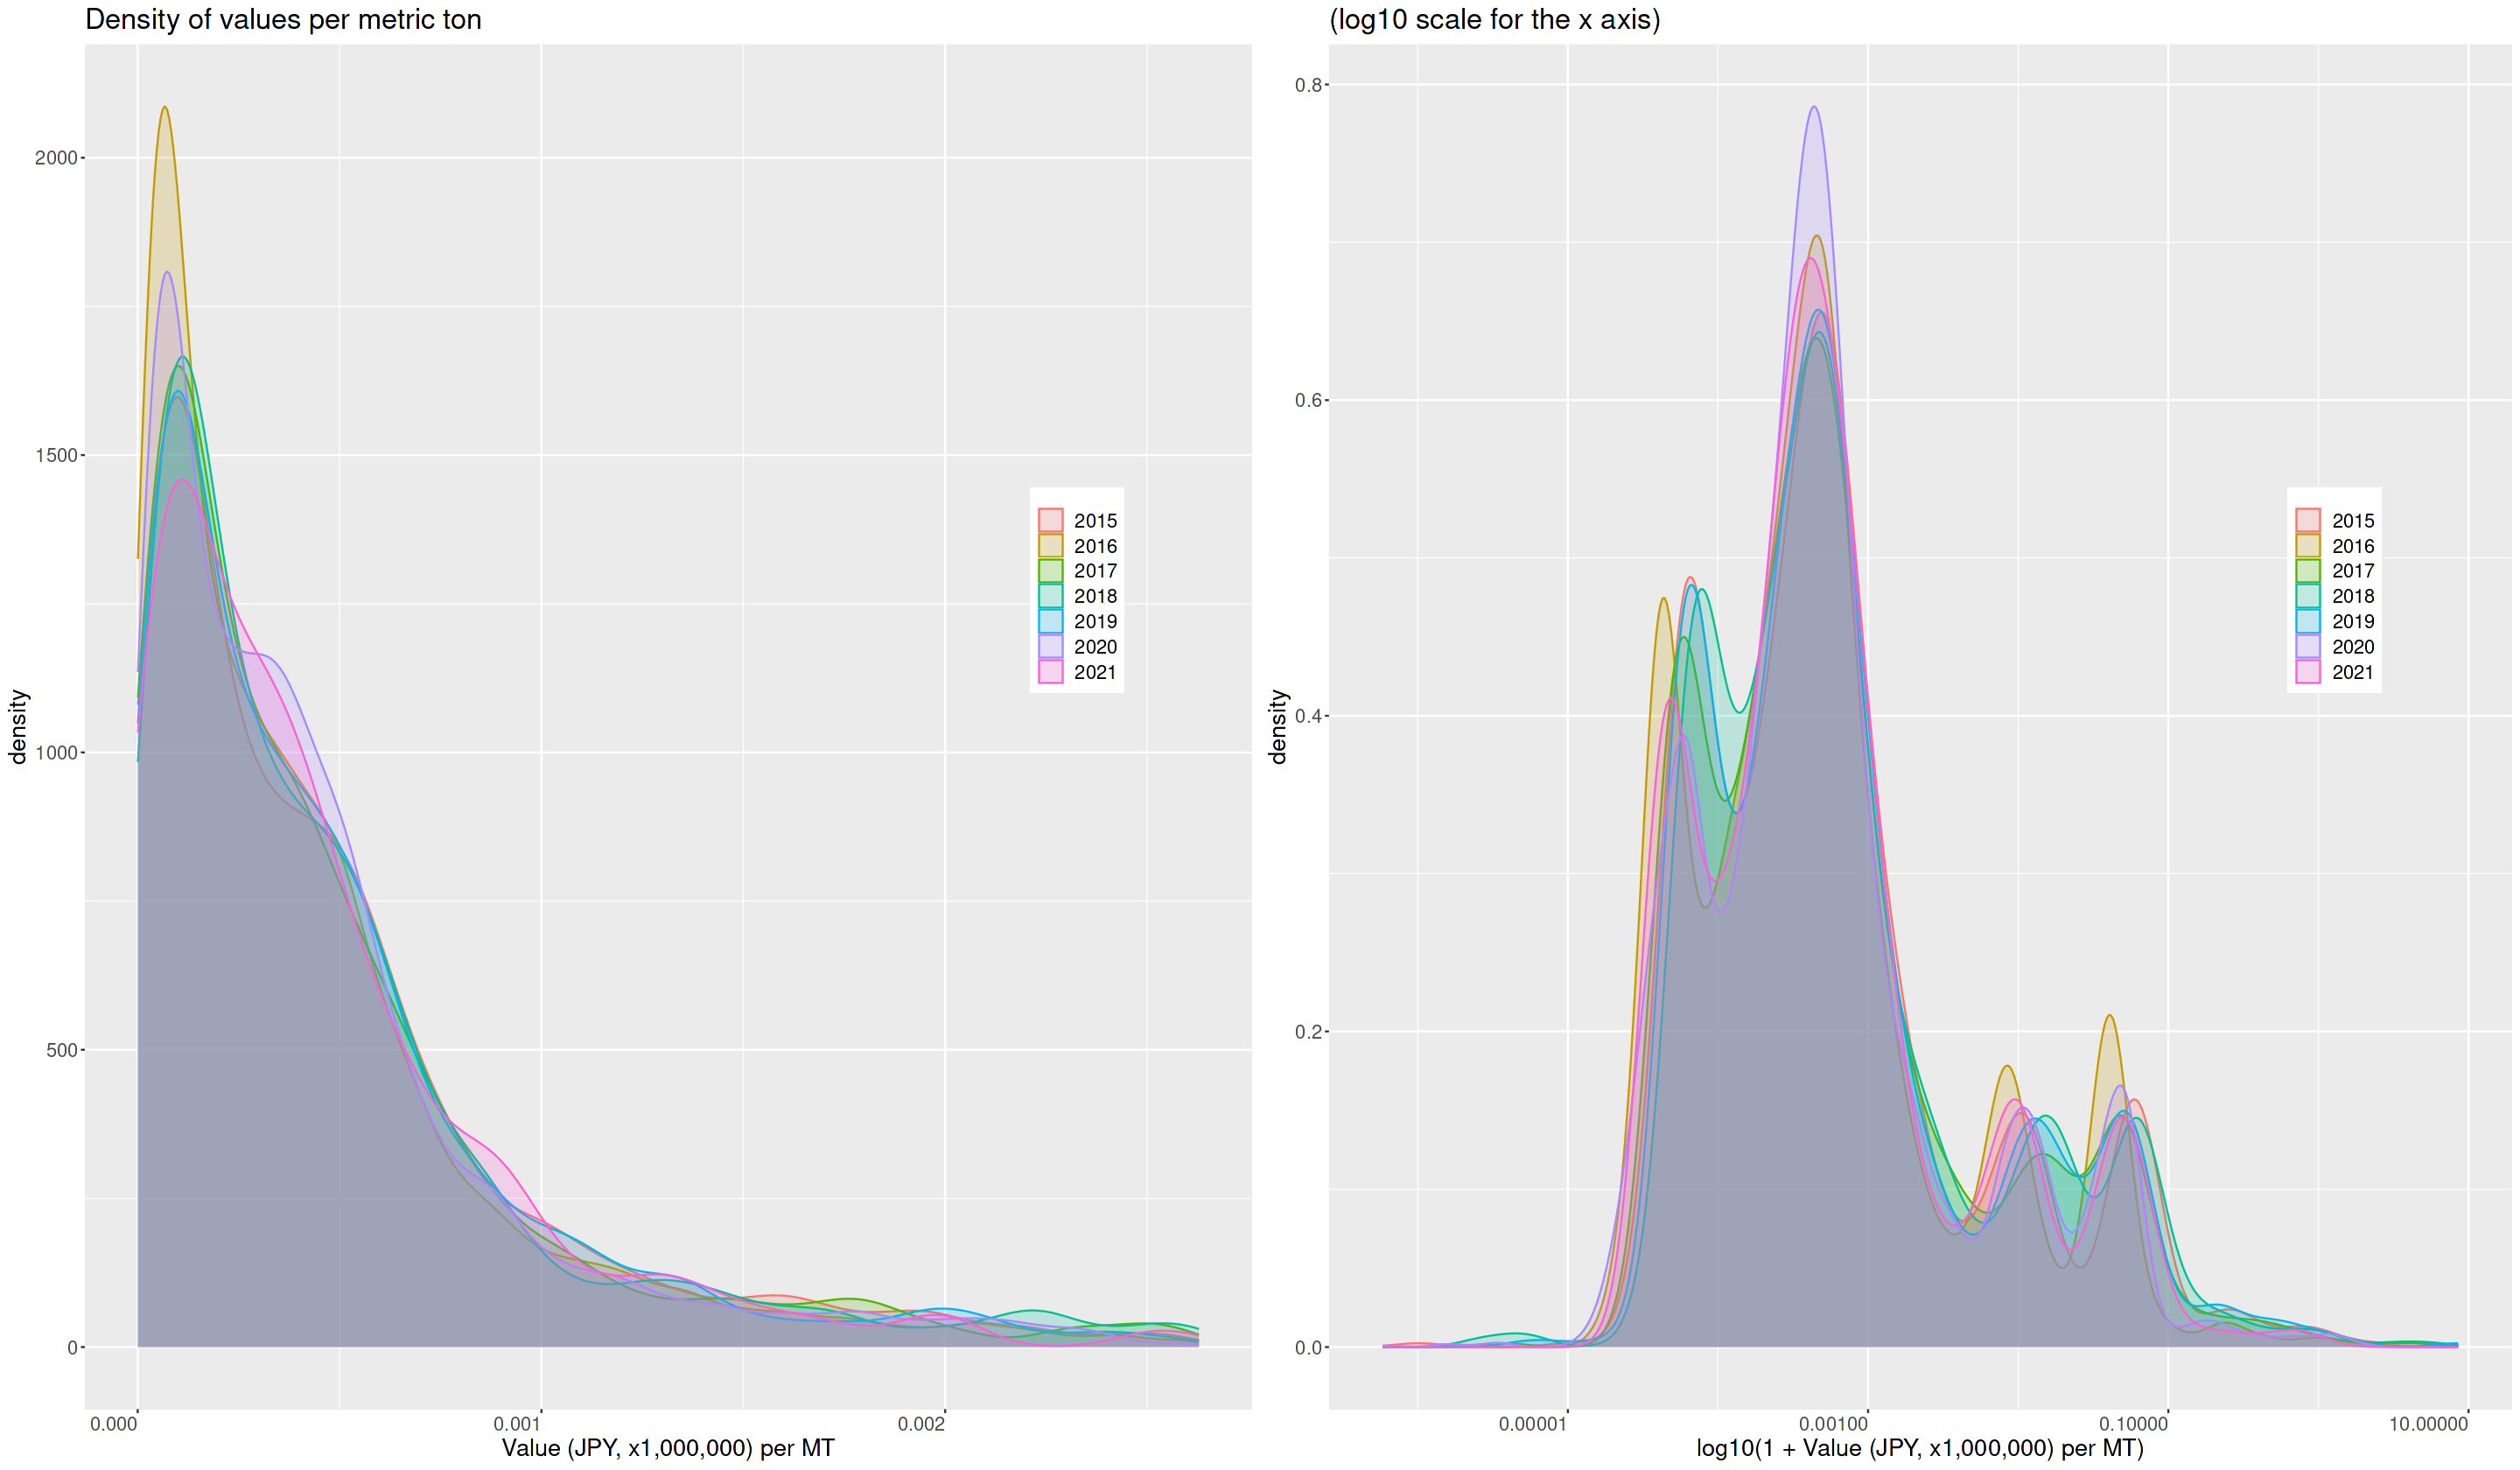

In [54]:
p1 <- ggplot(data[value_per_metric_ton < maxThreshold], aes(x = value_per_metric_ton, group = Year,  fill = Year, color = Year)) +
  geom_density(alpha = 0.2, na.rm = TRUE) +
  labs(title = "Density of values per metric ton", x = paste0("Value (JPY, x", format(kYenFactor, nsmall = 0, big.mark = ",", digits = 0), ")", " per MT"))  +
  theme(text = element_text(size = 16), legend.title =  element_blank(),
        axis.text.x = element_text(angle = 0, hjust = 1), 
        legend.position = c(0.85, 0.60))
figure_width <- 20  # Adjust the width as desired
figure_height <- 14  # Adjust the height as desired
p2 <- ggplot(data, aes(x = value_per_metric_ton, group = Year, fill = Year, color = Year)) +
  geom_density(alpha = 0.2, na.rm = TRUE) +
  scale_x_log10() +
  labs(title = "(log10 scale for the x axis)", x = paste0("log10", "(1 + ", "Value (JPY, x", format(kYenFactor, nsmall = 0, big.mark = ",", digits = 0), ")", " per MT)"))  +
  theme(text = element_text(size = 16), legend.title =  element_blank(),
        axis.text.x = element_text(angle = 0, hjust = 1), 
        legend.position = c(0.85, 0.60))

grid.arrange(p1, p2, ncol = 2)

In [55]:
head(Y,5)

hs9,hs6,hs4,hs2,index,exp_imp,Year,Q1,Q2,Value,Country_name,Area,hs2_name,hs4_name,hs6_name,hs9_name
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
11,0,0,0,2839027,2,1997,0,37630,3.772,Korea,Asia,dummy,unknow,Unknown,airplain_meal_etc
11,0,0,0,2925627,2,1998,0,18976,3.949,Korea,Asia,dummy,unknow,Unknown,airplain_meal_etc
11,0,0,0,3011545,2,1999,0,19169,3.911,Korea,Asia,dummy,unknow,Unknown,airplain_meal_etc
11,0,0,0,3100430,2,2000,0,41810,5.592,Korea,Asia,dummy,unknow,Unknown,airplain_meal_etc
11,0,0,0,3191238,2,2001,0,41911,6.467,Korea,Asia,dummy,unknow,Unknown,airplain_meal_etc


In [56]:
Y_Vietnam <- Y[Y$Country_name == "Viet_Nam", ]
head(Y_Vietnam,5)

hs9,hs6,hs4,hs2,index,exp_imp,Year,Q1,Q2,Value,Country_name,Area,hs2_name,hs4_name,hs6_name,hs9_name
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
19,0,0,0,2839058,2,1997,0,4016,4.280,Viet_Nam,Asia,dummy,unknow,Unknown,airplain_others
19,0,0,0,2925662,2,1998,0,1600,4.461,Viet_Nam,Asia,dummy,unknow,Unknown,airplain_others
19,0,0,0,3011582,2,1999,0,2291,2.265,Viet_Nam,Asia,dummy,unknow,Unknown,airplain_others
19,0,0,0,3100464,2,2000,0,3246,2.827,Viet_Nam,Asia,dummy,unknow,Unknown,airplain_others
19,0,0,0,3191268,2,2001,0,4976,3.552,Viet_Nam,Asia,dummy,unknow,Unknown,airplain_others


In [57]:
Y_Vietnam_exp_imp_1 <- Y_Vietnam[Y_Vietnam$exp_imp == 1, ]
head(Y_Vietnam_exp_imp_1,5)


hs9,hs6,hs4,hs2,index,exp_imp,Year,Q1,Q2,Value,Country_name,Area,hs2_name,hs4_name,hs6_name,hs9_name
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
190,0,0,0,157777,1,1997,0,4202263,9813.067,Viet_Nam,Asia,dummy,unknow,Unknown,re_export_ohters
190,0,0,0,315549,1,1998,0,5744914,16306.845,Viet_Nam,Asia,dummy,unknow,Unknown,re_export_ohters
190,0,0,0,467270,1,1999,0,2227287,16158.222,Viet_Nam,Asia,dummy,unknow,Unknown,re_export_ohters
190,0,0,0,614365,1,2000,0,2348634,24751.808,Viet_Nam,Asia,dummy,unknow,Unknown,re_export_ohters
190,0,0,0,763245,1,2001,0,2410677,4858.000,Viet_Nam,Asia,dummy,unknow,Unknown,re_export_ohters


In [58]:
# Y_Vietnam_exp_imp_1_unq <- unique(Y_Vietnam_exp_imp_1$hs9)
# Y_Vietnam_exp_imp_1_unq

# unique_years_X <- unique(X$Year)

In [59]:
# Đếm số lần xuất hiện của mỗi mã
hs9_counts <- table(Y_Vietnam_exp_imp_1$hs9)
hs6_counts <- table(Y_Vietnam_exp_imp_1$hs6)
hs4_counts <- table(Y_Vietnam_exp_imp_1$hs4)
hs2_counts <- table(Y_Vietnam_exp_imp_1$hs2)

# Lấy 5 mã xuất hiện nhiều nhất
top_3_hs9 <- names(head(sort(hs9_counts, decreasing = TRUE), 3))
top_3_hs6 <- names(head(sort(hs6_counts, decreasing = TRUE), 3))
top_3_hs4 <- names(head(sort(hs4_counts, decreasing = TRUE), 3))
top_3_hs2 <- names(head(sort(hs2_counts, decreasing = TRUE), 3))

# In kết quả
cat("Top 3 hs9: ", top_3_hs9, "\n")
cat("Top 3 hs6: ", top_3_hs6, "\n")
cat("Top 3 hs4: ", top_3_hs4, "\n")
cat("Top 3 hs2: ", top_3_hs2, "\n")


Top 3 hs9:  190 110100000 120991000 
Top 3 hs6:  540761 721499 391990 
Top 3 hs4:  5407 7208 5208 
Top 3 hs2:  84 85 72 


In [60]:
# Đếm số lần xuất hiện của mỗi mã
hs9_counts <- table(Y_Vietnam_exp_imp_1$hs9)
hs6_counts <- table(Y_Vietnam_exp_imp_1$hs6)
hs4_counts <- table(Y_Vietnam_exp_imp_1$hs4)
hs2_counts <- table(Y_Vietnam_exp_imp_1$hs2)

# Lấy 5 mã xuất hiện nhiều nhất
top_One_hs9 <- names(head(sort(hs9_counts, decreasing = TRUE), 1))
top_One_hs6 <- names(head(sort(hs6_counts, decreasing = TRUE), 1))
top_One_hs4 <- names(head(sort(hs4_counts, decreasing = TRUE), 1))
top_One_hs2 <- names(head(sort(hs2_counts, decreasing = TRUE), 1))

# In kết quả
cat("Top 1 hs9: ", top_One_hs9, "\n")
cat("Top 1 hs6: ", top_One_hs6, "\n")
cat("Top 1 hs4: ", top_One_hs4, "\n")
cat("Top 1 hs2: ", top_One_hs2, "\n")

# Việt Nam

Top 1 hs9:  190 
Top 1 hs6:  540761 
Top 1 hs4:  5407 
Top 1 hs2:  84 


In [104]:
top_3_hs4 <- c(5407, 7208, 5208)
top_3_hs6 <- c(540761, 721499, 391990)
top_3_hs2 <- c(84 , 85 , 72 )

# Tạo bảng từ danh sách
# hs4_top3 <- data.frame(hs4 = top_3_hs4)
# hs9_values <- c(190, 110100000, 120991000)

# Lọc các dòng có giá trị hs9 trong danh sách
filtered_data_hs4 <- Y_Vietnam_exp_imp_1[Y_Vietnam_exp_imp_1$hs4 %in% top_3_hs4, ]
filtered_data_hs2 <- Y_Vietnam_exp_imp_1[Y_Vietnam_exp_imp_1$hs2 %in% top_3_hs2, ]
filtered_data_hs6 <- Y_Vietnam_exp_imp_1[Y_Vietnam_exp_imp_1$hs6 %in% top_3_hs6, ]
# In bảng
# hs4_top3
# head(filtered_data_hs2,5)

In [79]:
# Danh sách mã hs9
top_3_hs9 <- c(190, 110100000, 120991000)

# Tạo bảng từ danh sách
hs9_top3 <- data.frame(hs9 = top_3_hs9)

# In bảng
hs9_top3


hs9
<dbl>
190
110100000
120991000


In [62]:
# Các giá trị hs9 cần kiểm tra
hs9_values <- c(190, 110100000, 120991000)

# Lọc các dòng có giá trị hs9 trong danh sách
filtered_data <- Y_Vietnam_exp_imp_1[Y_Vietnam_exp_imp_1$hs9 %in% hs9_values, ]

# In kết quả
head(filtered_data,5)


hs9,hs6,hs4,hs2,index,exp_imp,Year,Q1,Q2,Value,Country_name,Area,hs2_name,hs4_name,hs6_name,hs9_name
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
190,0,0,0,157777,1,1997,0,4202263,9813.067,Viet_Nam,Asia,dummy,unknow,Unknown,re_export_ohters
190,0,0,0,315549,1,1998,0,5744914,16306.845,Viet_Nam,Asia,dummy,unknow,Unknown,re_export_ohters
190,0,0,0,467270,1,1999,0,2227287,16158.222,Viet_Nam,Asia,dummy,unknow,Unknown,re_export_ohters
190,0,0,0,614365,1,2000,0,2348634,24751.808,Viet_Nam,Asia,dummy,unknow,Unknown,re_export_ohters
190,0,0,0,763245,1,2001,0,2410677,4858.000,Viet_Nam,Asia,dummy,unknow,Unknown,re_export_ohters


In [116]:
# install.packages("GGally")
# install.packages("corrr")
head(filtered_data_hs2,5)

hs9,hs6,hs4,hs2,index,exp_imp,Year,Q1,Q2,Value,Country_name,Area,hs2_name,hs4_name,hs6_name,hs9_name
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
720110000,720110,7201,72,58702,1,1997,0,60000,2.210,Viet_Nam,Asia,Iron and steel.,Pig_iron_and_spiegeleisen_in_pigs__blocks_or_other_primary_forms,Non-alloy_pig_iron_containing_by_weight_0.5_%_or_less_of_phosphorus,Non-alloy_pig_iron_containing_by_weight_0.5_%_or_less_of_phosphorus
720110000,720110,7201,72,1403185,1,2006,0,199820,11.227,Viet_Nam,Asia,Iron and steel.,Pig_iron_and_spiegeleisen_in_pigs__blocks_or_other_primary_forms,Non-alloy_pig_iron_containing_by_weight_0.5_%_or_less_of_phosphorus,Non-alloy_pig_iron_containing_by_weight_0.5_%_or_less_of_phosphorus
720110000,720110,7201,72,1551681,1,2007,0,817480,44.816,Viet_Nam,Asia,Iron and steel.,Pig_iron_and_spiegeleisen_in_pigs__blocks_or_other_primary_forms,Non-alloy_pig_iron_containing_by_weight_0.5_%_or_less_of_phosphorus,Non-alloy_pig_iron_containing_by_weight_0.5_%_or_less_of_phosphorus
720110000,720110,7201,72,1700904,1,2008,0,964220,68.894,Viet_Nam,Asia,Iron and steel.,Pig_iron_and_spiegeleisen_in_pigs__blocks_or_other_primary_forms,Non-alloy_pig_iron_containing_by_weight_0.5_%_or_less_of_phosphorus,Non-alloy_pig_iron_containing_by_weight_0.5_%_or_less_of_phosphorus
720110000,720110,7201,72,1845552,1,2009,0,64404720,1704.041,Viet_Nam,Asia,Iron and steel.,Pig_iron_and_spiegeleisen_in_pigs__blocks_or_other_primary_forms,Non-alloy_pig_iron_containing_by_weight_0.5_%_or_less_of_phosphorus,Non-alloy_pig_iron_containing_by_weight_0.5_%_or_less_of_phosphorus


In [121]:
library(dplyr)

sum_value_by_hs2_1 <- Y_Vietnam_exp_imp_1 %>%
  filter(hs2 != 0) %>%
  group_by(hs2) %>%
  summarise(total_value = sum(Value))

total_sum_value <- sum(sum_value_by_hs2_1$total_value)

# total_sum_value
# sum_value_by_hs2_1

In [114]:
### hs2 ###
# head(filtered_data_hs2,5)
library(dplyr)

sum_value_by_hs2 <- filtered_data_hs2 %>%
  group_by(hs2) %>%
  summarise(total_value = sum(Value))

sum_value_by_hs2




hs2,total_value
<dbl>,<dbl>
72,2375605
84,3778426
85,3997643


In [126]:
library(dplyr)

sum_value_by_hs2 <- data.frame(
  hs2 = c(72, 84, 85),
  total_value = c(2375605, 3778426, 3997643)
)
# Percent = (total_value / total_sum_value) * 100
total_sum_value <- sum(sum_value_by_hs2$total_value)

sum_value_by_hs2 <- sum_value_by_hs2 %>%
  mutate(Percent = round((total_value / total_sum_value) * 100, 2)

sum_value_by_hs2


hs2,total_value,Percent
<dbl>,<dbl>,<dbl>
72,2375605,23.40
84,3778426,37.22
85,3997643,39.38


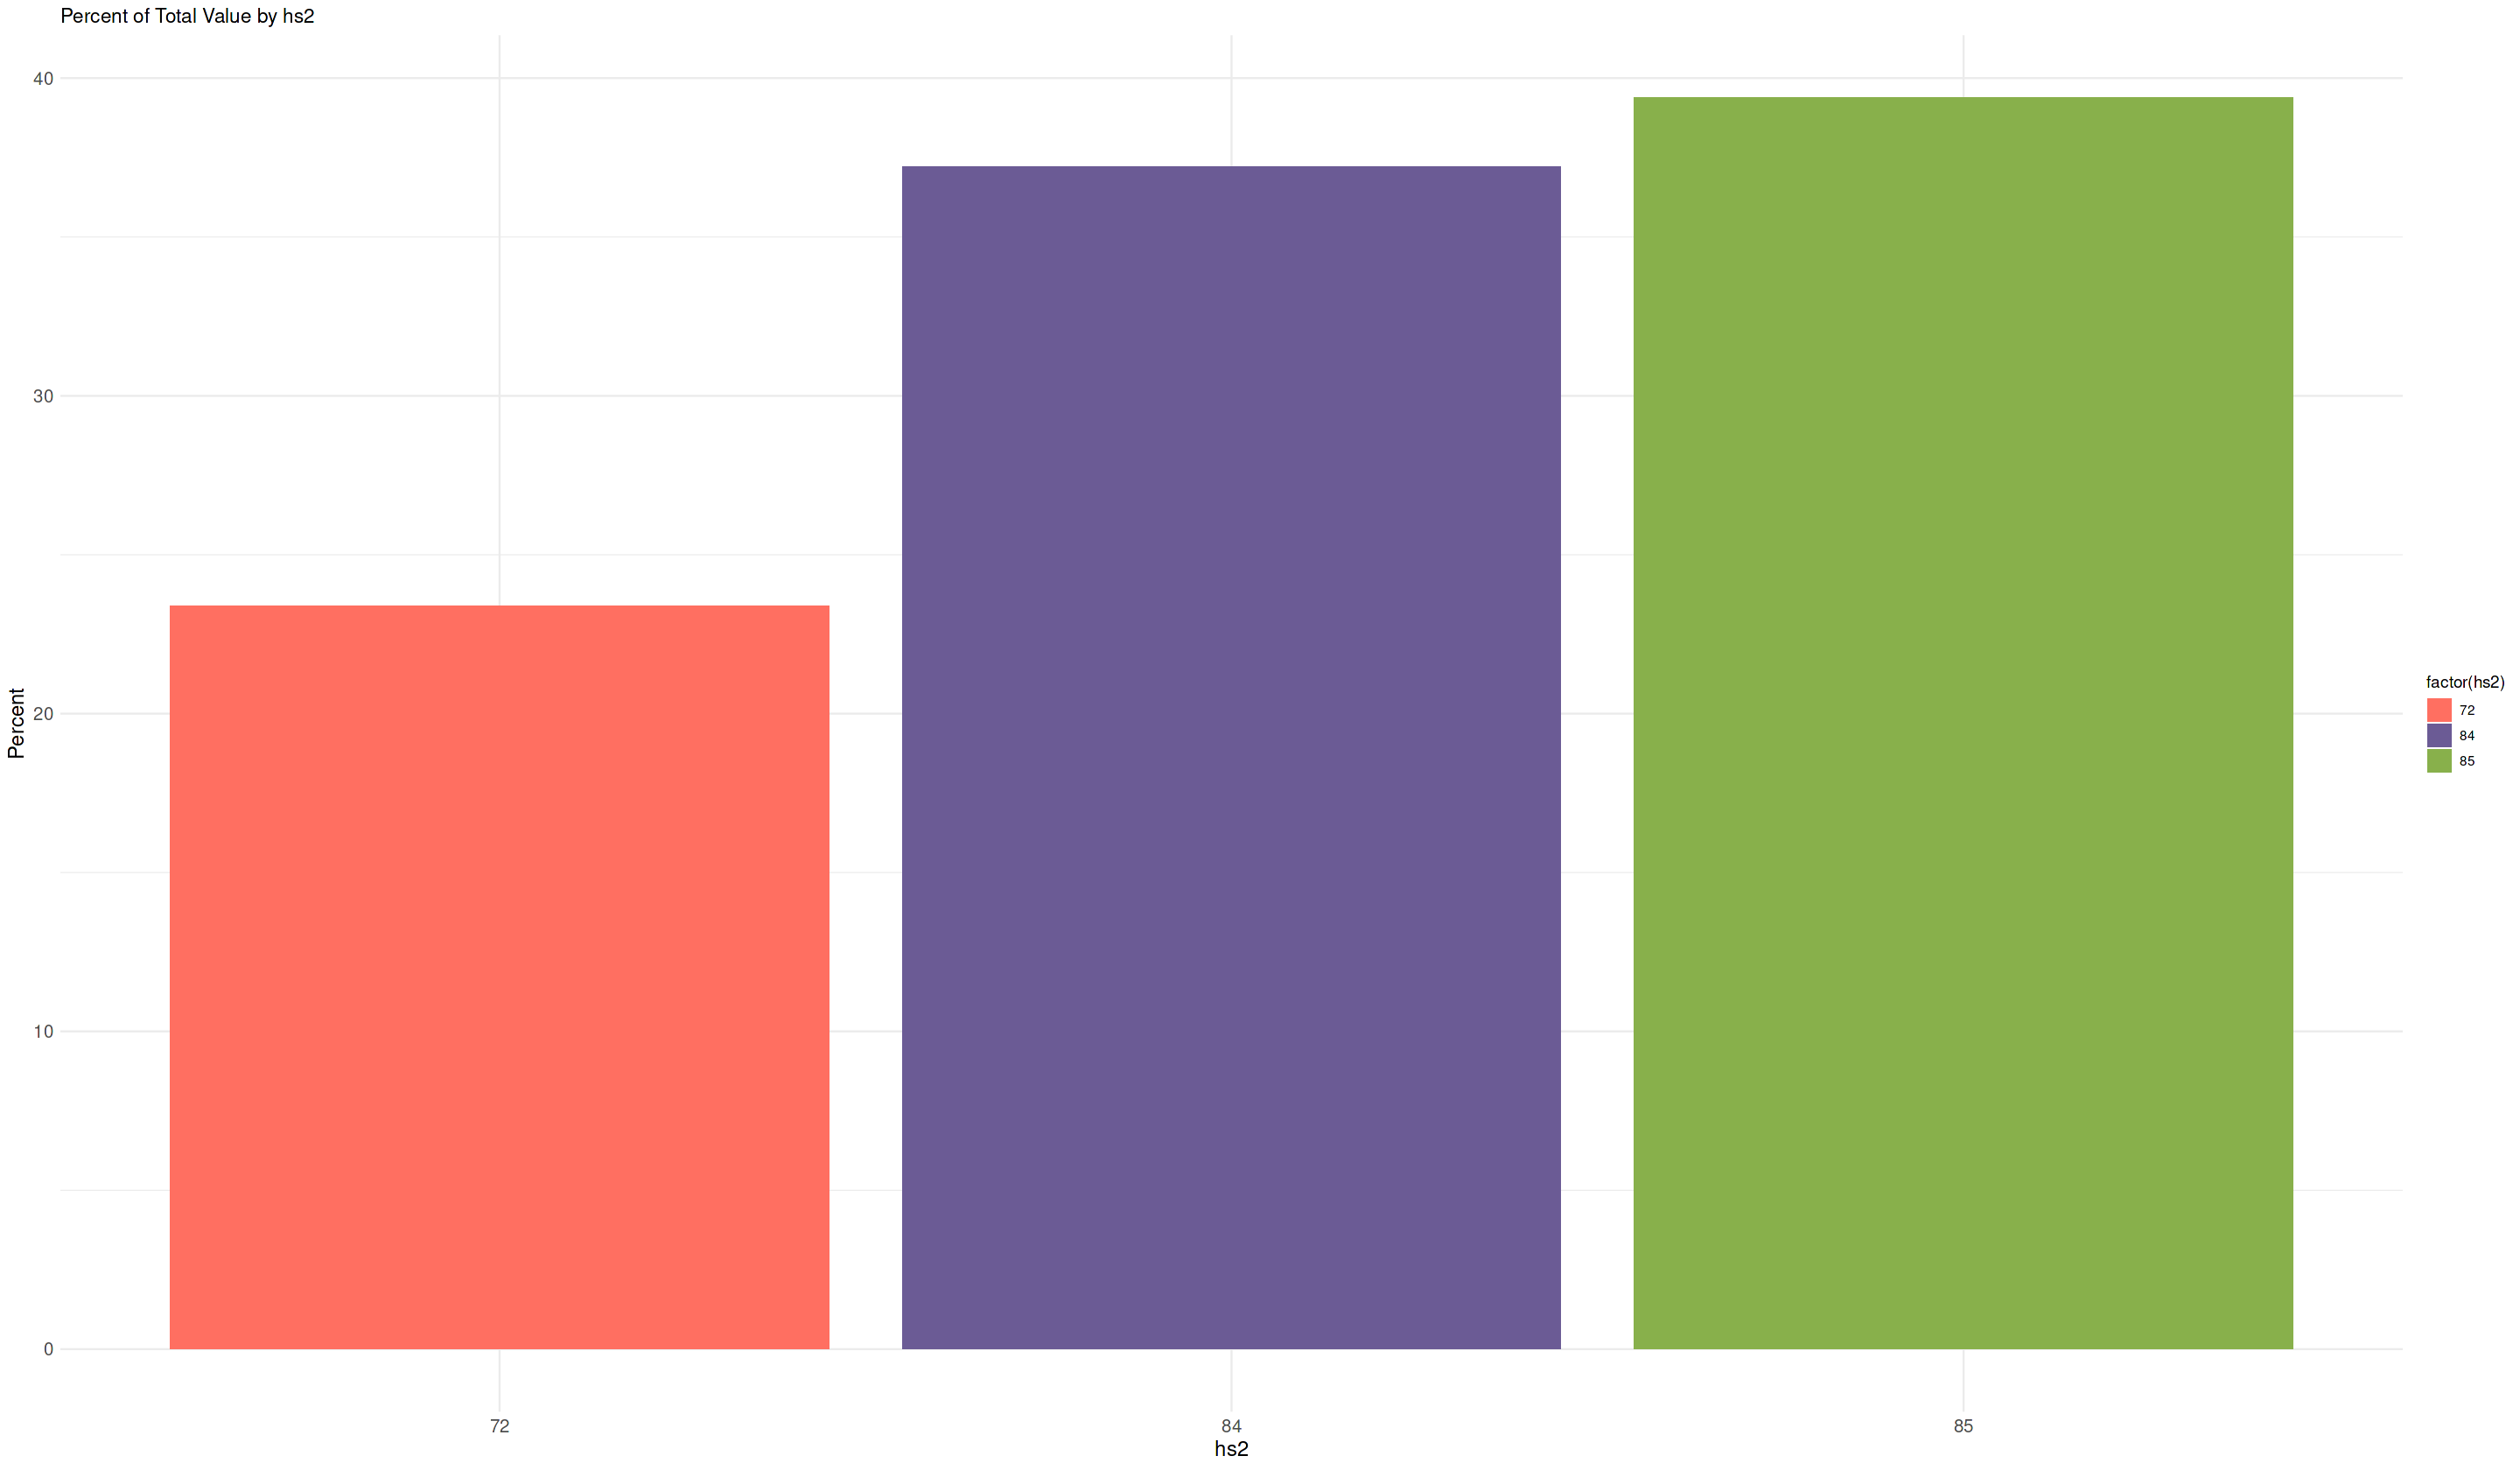

In [129]:
library(ggplot2)

# Tạo biểu đồ cột nhiễu động với màu sắc tùy chỉnh
plot <- ggplot(sum_value_by_hs2, aes(x = factor(hs2), y = Percent, fill = factor(hs2))) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_fill_manual(values = custom_colors) +  # Sử dụng bảng màu tùy chỉnh
  labs(x = "hs2", y = "Percent") +
  ggtitle("Percent of Total Value by hs2") +
  theme_minimal() +  # Tùy chỉnh giao diện biểu đồ
  theme(axis.text = element_text(size = 12),  # Tăng kích cỡ chữ trên trục x và y
        axis.title = element_text(size = 14))  # Tăng kích cỡ chữ cho tên trục x và y

# Hiển thị biểu đồ
plot


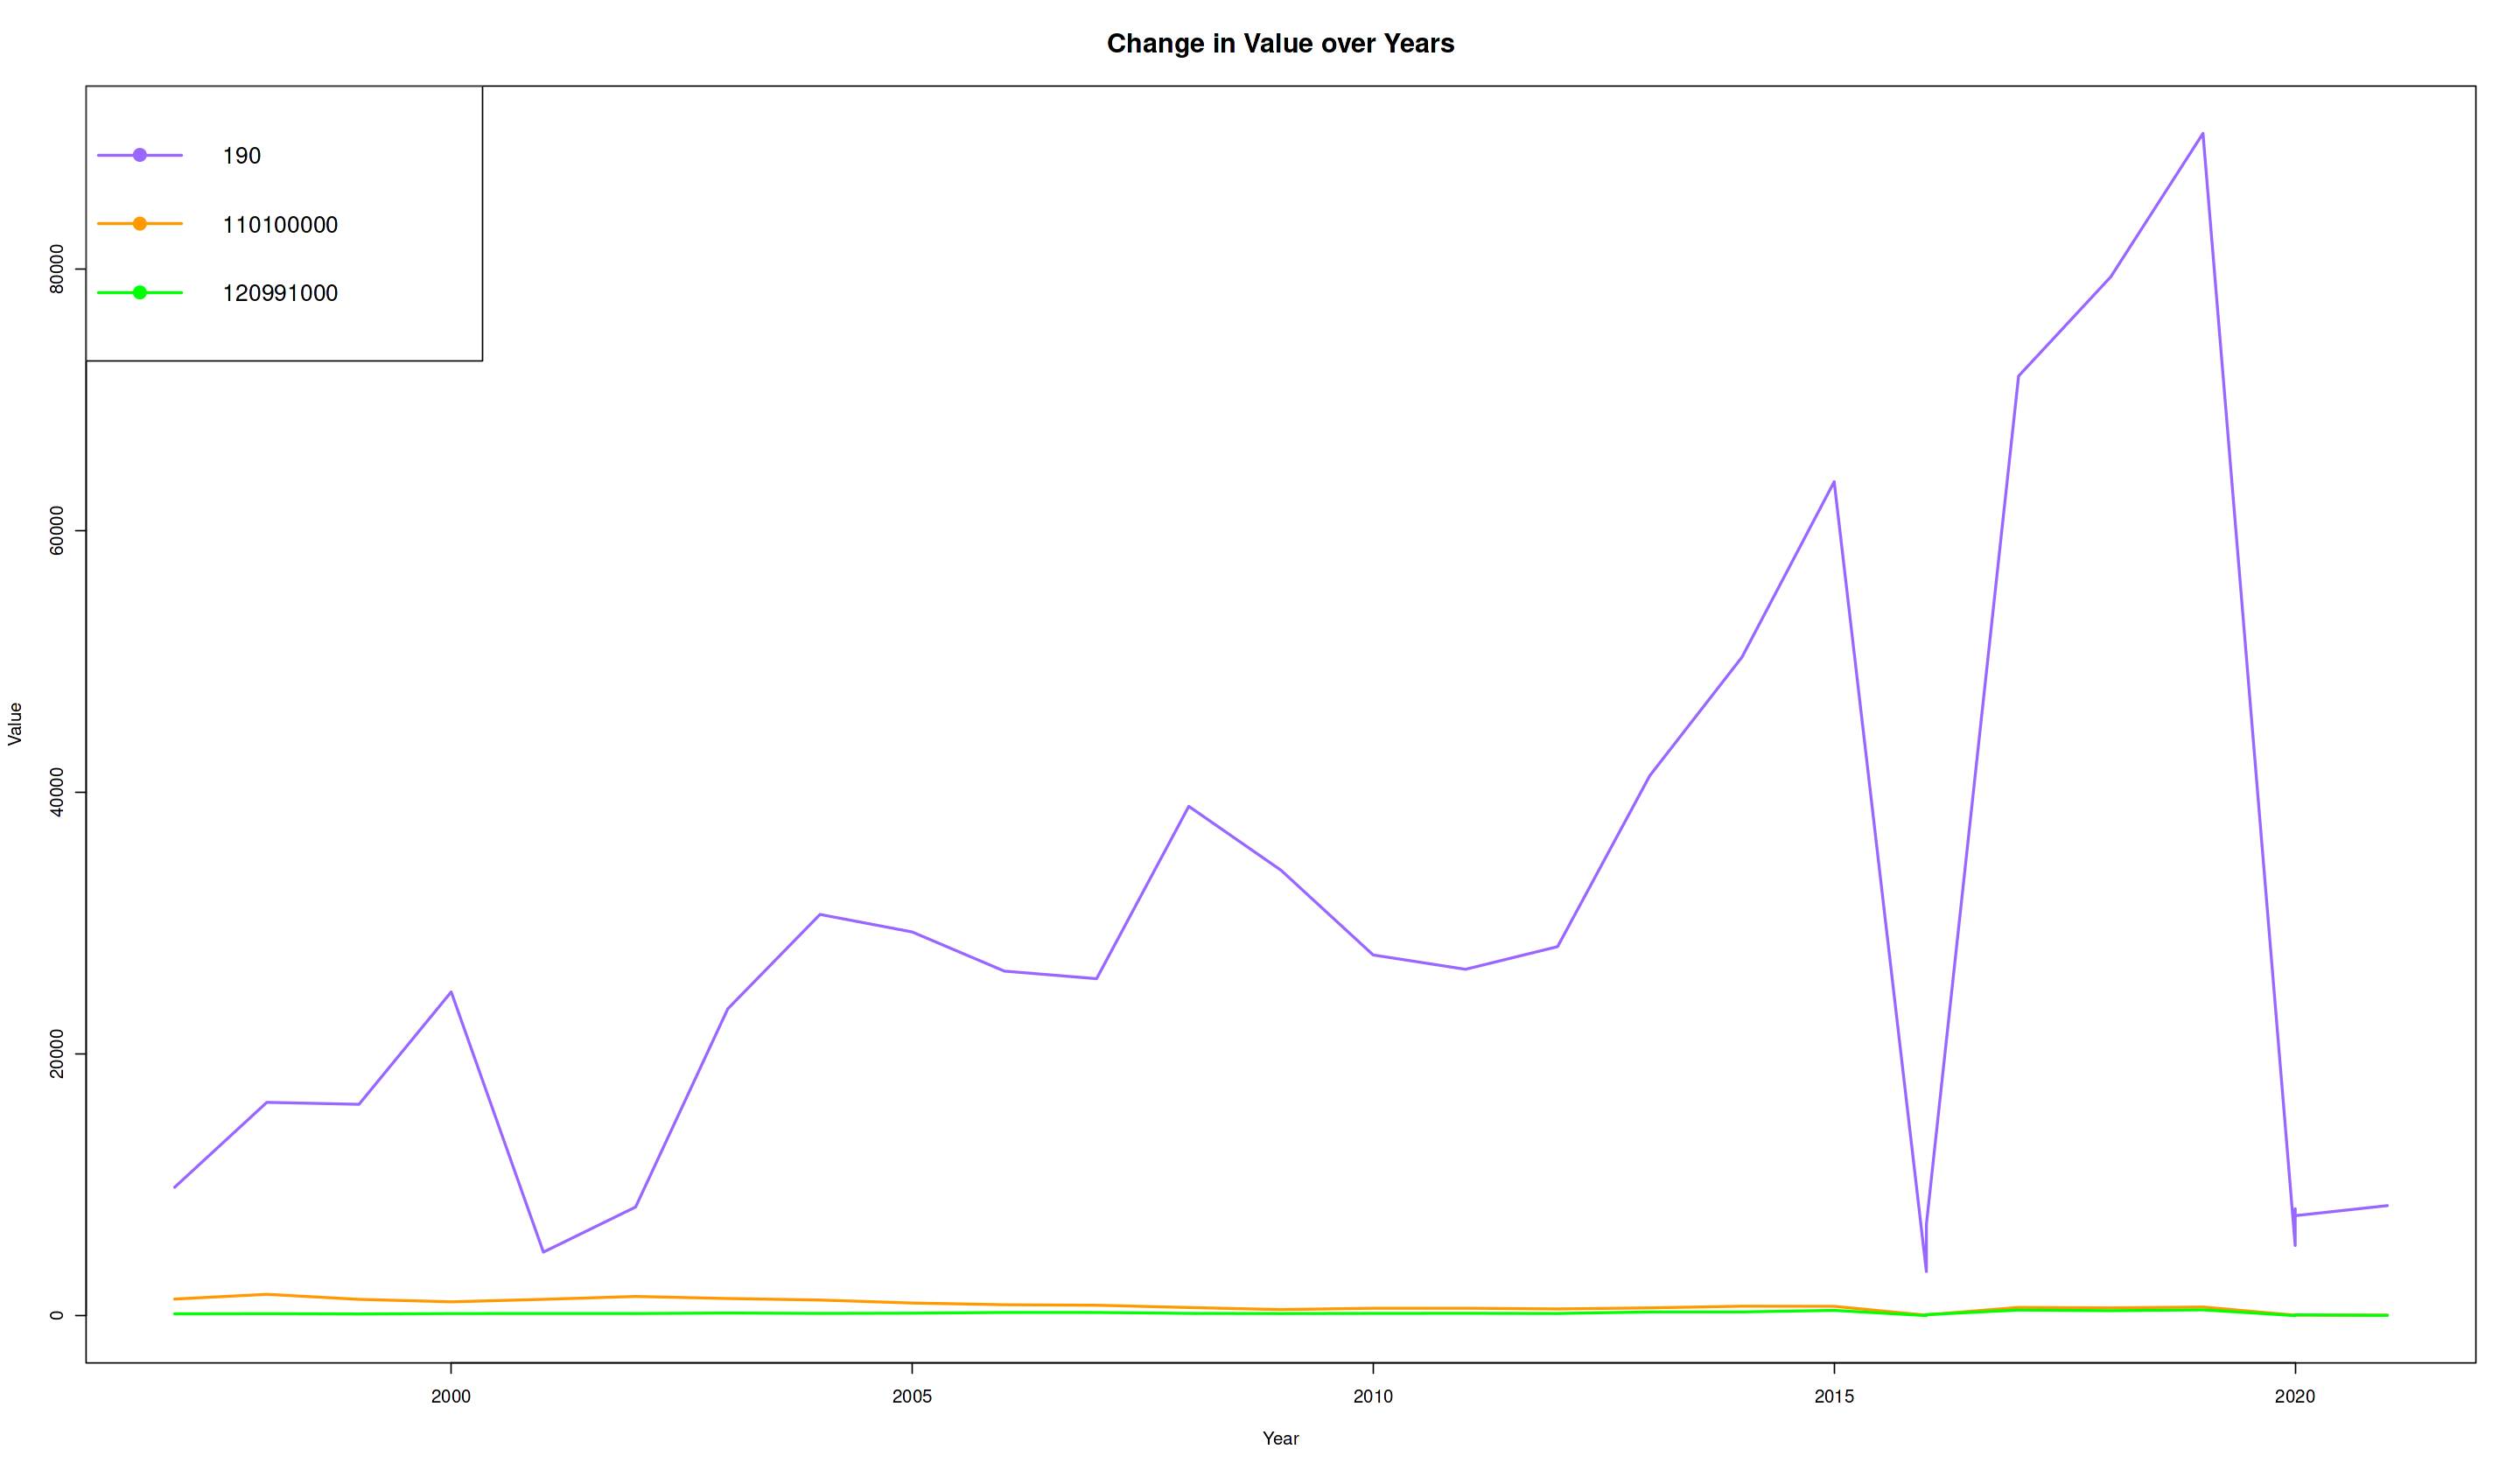

In [75]:
# # Filter the data for the specific hs9 codes
# filtered_data_hs9 <- filtered_data[filtered_data$hs9 %in% c("190", "110100000", "120991000"), ]

# # Create an empty plot
# plot(1, 1, type = "n", xlim = range(filtered_data_hs9$Year), ylim = range(filtered_data_hs9$Value),
#      xlab = "Year", ylab = "Value", main = "Change in Value over Years")

# # Plot lines for each hs9 code with thicker lines and circular markers at specific years
# colors <- c("blue", "red", "green")  # Define colors for each hs9 code
# legend_labels <- c("190", "110100000", "120991000")  # Define legend labels
# for (code in legend_labels) {
#   points <- filtered_data_hs9[filtered_data_hs9$hs9 == code, c("Year", "Value")]
#   lines(points$Year, points$Value, col = colors[code == legend_labels], lwd = 2)
#   # Add circular markers at specific years
#   marker_years <- c(2000, 2005, 2010, 2015)
#   marker_values <- points[points$Year %in% marker_years, "Value"]
#   points(marker_years, rep(NA, length(marker_years)), col = colors[code == legend_labels], pch = 19)
# }

# # Add legend
# legend("topleft", legend = legend_labels, col = colors, lty = 1, lwd = 2, pch = 19)

# # Adjust the plot margins if needed
# par(mar = c(5, 4, 4, 8) + 0.1)

# Optional: Customize the plot appearance, labels, etc.


# Set the line colors
line_colors <- c("#9966FF", "#FF9900", "green")  # Define custom line colors

# Create an empty plot with adjusted margins
plot(1, 1, type = "n", xlim = range(filtered_data_hs9$Year), ylim = range(filtered_data_hs9$Value),
     xlab = "Year", ylab = "Value", main = "Change in Value over Years", cex.main = 1.5)

# Plot lines and markers with adjusted line width, marker size, and line color
for (i in 1:length(legend_labels)) {
  code <- legend_labels[i]
  points <- filtered_data_hs9[filtered_data_hs9$hs9 == code, c("Year", "Value")]
  lines(points$Year, points$Value, col = line_colors[i], lwd = 2)
  # Add circular markers at specific years
  marker_years <- c(2000, 2005, 2010, 2015)
  marker_values <- points[points$Year %in% marker_years, "Value"]
  points(marker_years, rep(NA, length(marker_years)), col = line_colors[i], pch = 19, cex = 1.5)
}

# Add legend with adjusted font size and line colors
legend("topleft", legend = legend_labels, col = line_colors, lty = 1, lwd = 2, pch = 19, cex = 1.3)


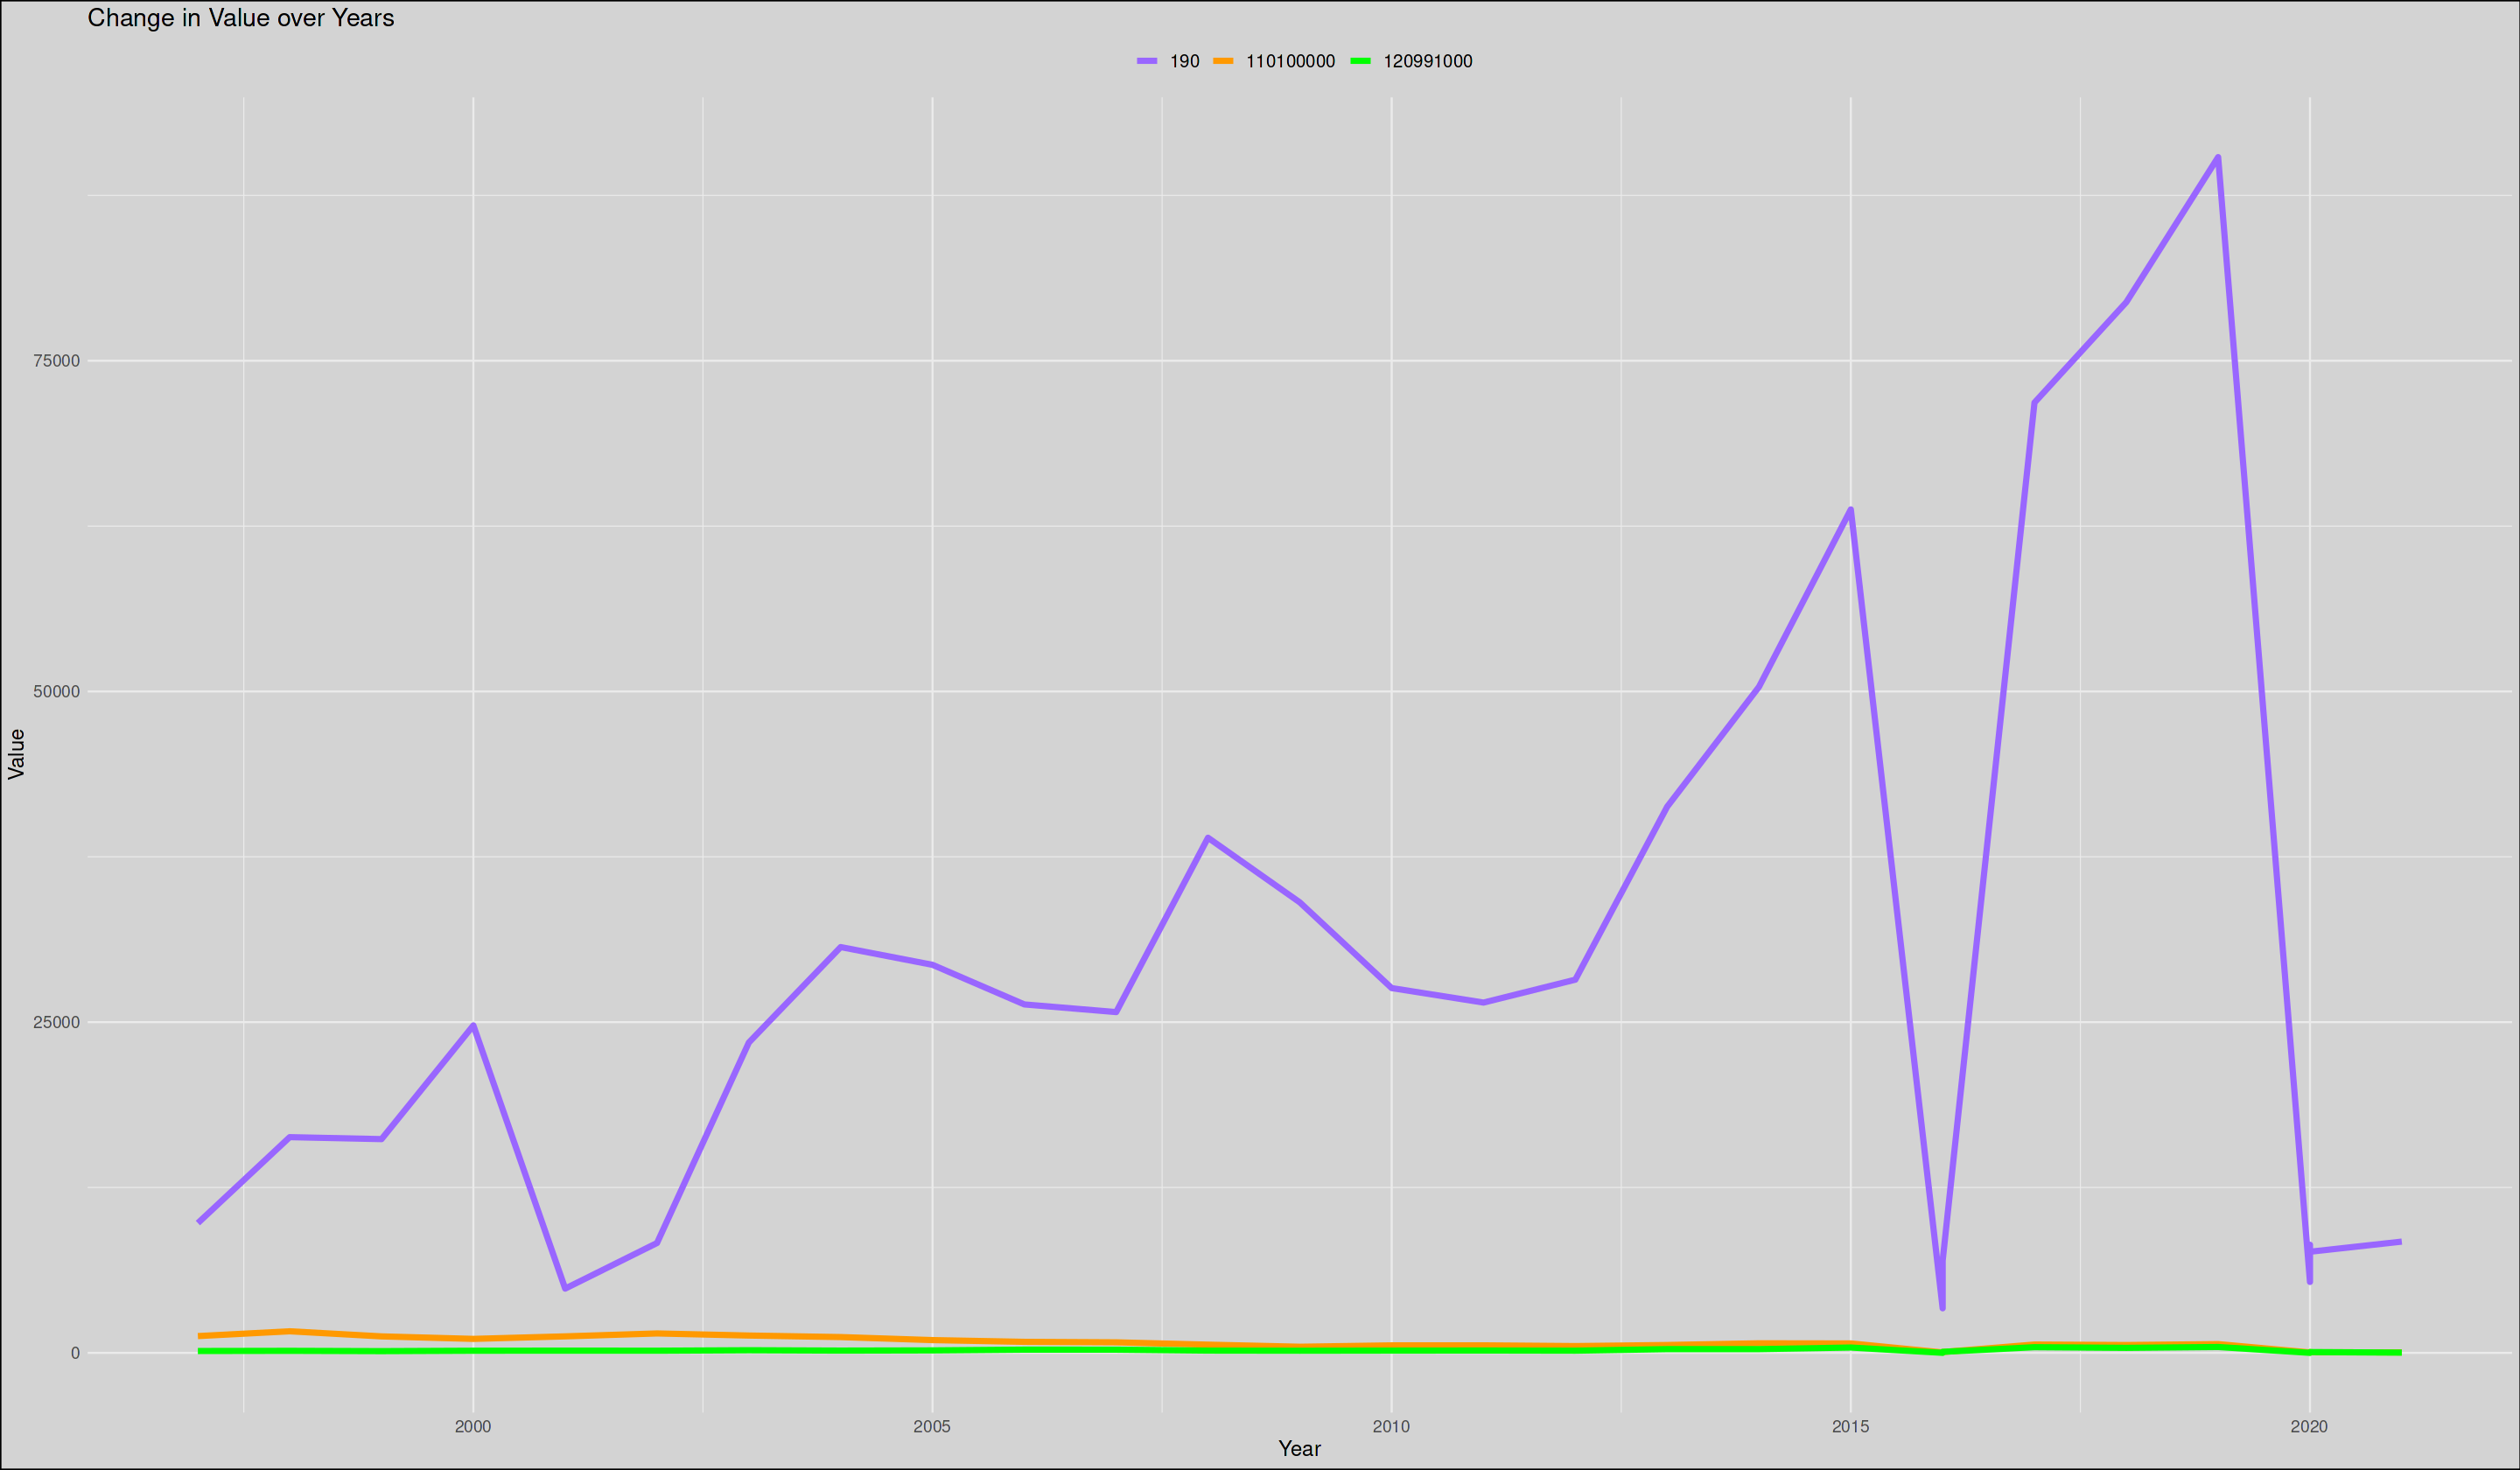

In [77]:
library(ggplot2)

# Convert hs9 to a factor
filtered_data_hs9$hs9 <- as.factor(filtered_data_hs9$hs9)

# Create a line graph using ggplot
ggplot(filtered_data_hs9, aes(x = Year, y = Value, color = hs9, group = hs9)) +
  geom_line(size = 1.5) +
  labs(title = "Change in Value over Years",
       x = "Year", y = "Value") +
  scale_color_manual(values = line_colors) +
  theme_minimal() +
  theme(text = element_text(size = 14),
        legend.position = "top", legend.title = element_blank(),
        legend.text = element_text(size = 12),
        plot.background = element_rect(fill = "lightgray")) +
  guides(color = guide_legend(override.aes = list(size = 1.5)))

# Adjust the plot size if needed
# ggsave("line_graph.png", width = 8, height = 6, dpi = 300)
